# readme
descrip: save FOSI HR sea level anomaly trends to a nc file

update history: <br>
v1.0 DL 2021Jan19

extra notes: <br>

# import modules

In [1]:
# general python packages
import numpy as np
from scipy import stats
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
%matplotlib inline
import proplot as plot
import cartopy
import cartopy.crs as ccrs
cartopy.config['pre_existing_data_dir']='/ihesp/shared/cartopy_features'
# from cartopy.mpl.geoaxes import GeoAxes
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
# from mpl_toolkits.axes_grid1 import AxesGrid

# python GCM(POP) packages
# import xgcm
# import pop_tools
# import xoak
# import xesmf as xe

# dask jupyter lab packages
from dask.distributed import Client
# from dask.distributed import performance_report

# file name with time packages
# from itertools import product
# from cftime import DatetimeNoLeap

# incorporate dask 

In [2]:
client = Client("tcp://10.73.2.65:35127")
client

Client Scheduler: tcp://10.73.3.172:44182 Dashboard: http://10.73.3.172:8787/status,Cluster Workers: 10 Cores: 10 Memory: 210.00 GB


# define parameters

In [33]:
# === North Atlantic ===
# # lat, lon ranges and nlat, nlon ranges for t12 and g16 grids, 
# # nlat and nlon ranges are slightly larger than lat and lon ranges. 
# lon1_NA, lon2_NA = -100, -40
# lat1_NA, lat2_NA = 10, 60

# nlon1_NA_t12, nlon2_NA_t12 = 50, 800
# nlat1_NA_t12, nlat2_NA_t12 = 1200, 2100

# nlon1_NA_g16, nlon2_NA_g16 = 260, 321
# nlat1_NA_g16, nlat2_NA_g16 = 200, 370
# =======================

# === Gulf of Maine (GMa) ===
# lat1_GMa, lat2_GMa = 25, 55
# lon1_GMa, lon2_GMa = -85, -50 # GMa: Gulf of Maine

# lon1b_GMa, lon2b_GMa = -71+360, -66+360  # b: box, highlight region with a box 
# lat1b_GMa, lat2b_GMa = 42, 45
# ===========================

# === Gulf of Maxico (GMe) ===
# lat1_GMe, lat2_GMe = 15, 35
# lon1_GMe, lon2_GMe = -100, -75 # GMe: Gulf of Mexico

# lon1b_GMe, lon2b_GMe = -95+360, -85+360 # b: box, highlight region with a box 
# lat1b_GMe, lat2b_GMe = 23, 28
nlon1_GMe_t12, nlon2_GMe_t12 = 80, 400 
nlat1_GMe_t12, nlat2_GMe_t12 = 1250, 1600
# ============================

time1_yr_ssh = np.arange(1993.5,2019.5+1) # time period for AVISO obs

chunks_HR = {'nlat':400,'nlon':300}
chunks_LR = {'nlat':384,'nlon':320}

outdir = '/scratch/user/dapengli/Projects4iHESP/Project_SeaLevelUSEastCoast_2021Mar30/pics/'

pic1 = outdir+'SSHtrend_NA_AVISO_2021Jul01.png' # main text fig
pic2 = outdir+'SSHtrendnoMask_NA_2021Jul01.png' # main text fig
pic3 = outdir+'SSHtrendwithMask_NA_2021Jul01.png' # main text fig

# read files 

In [ ]:
infile_ssh_THe0 = ('/ihesp/archive/Sunway_Runs/HR_HF_TNST/'
                   'B.E.13.BTRANS.ne120_t12.sehires38.003.sunway.pop.h.SSH.185001.210012.nc') # e0: ensemble 0
ds_ssh_THe0 = xr.open_dataset(infile_ssh_THe0,chunks=chunks_HR)
ds_ssh_THe0

In [4]:
# #TH: transient HR
# infile_ssh_TH = ('/ihesp/archive/Sunway_Runs/HR_HF_TNST/'
#               'B.E.13.BTRANS.ne120_t12.sehires38.003.sunway.pop.h.SSH.185001.210012.nc')

# # infile0_TH = ('/ihesp/archive/'
# #               'B.E.13.BHISTC5.ne120_t12.sehires38.003.sunway/ocn/monthly/'
# #               'B.E.13.BHISTC5.ne120_t12.sehires38.003.sunway.pop.h.1850-01.nc')

# ds_ssh_TH = xr.open_dataset(infile_ssh_TH,chunks=chunks_HR)
# ds_ssh_TH

<xarray.Dataset>
Dimensions:     (d2: 2, nlat: 2400, nlon: 3600, time: 3012)
Coordinates:
  * time        (time) object 1850-02-01 00:00:00 ... 2100-12-17 00:00:00
    TLONG       (nlat, nlon) float64 dask.array<chunksize=(400, 300), meta=np.ndarray>
    TLAT        (nlat, nlon) float64 dask.array<chunksize=(400, 300), meta=np.ndarray>
Dimensions without coordinates: d2, nlat, nlon
Data variables:
    time_bound  (time, d2) object dask.array<chunksize=(3012, 2), meta=np.ndarray>
    SSH         (time, nlat, nlon) float32 dask.array<chunksize=(3012, 400, 300), meta=np.ndarray>
Attributes:
    title:           B.E.13.BHISTC5.ne120_t12.sehires38.003.sunway
    Conventions:     CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curr...
    contents:        Diagnostic and Prognostic Variables
    source:          CCSM POP2, the CCSM Ocean Component
    revision:        $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    calendar:        All years have exactly  365 days.
    start_time:      This dataset was created on 2019-10-29 at 17:54:15.4
    cell_methods:    cell_methods = time: mean ==> the variable values are av...
    nsteps_total:    19331
    tavg_sum:        2676600.0
    tavg_sum_qflux:  2676600.0
    NCO:             netCDF Operators version 4.9.1 (Homepage = http://nco.sf...

In [5]:
infile1_ssh_CH = ('/ihesp/archive/Sunway_Runs/HR_PI_CTRL/'
'B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.SSH.0021.0501.nc')
ds_ssh_CH_raw = xr.open_dataset(infile1_ssh_CH, chunks=chunks_HR)
print(ds_ssh_CH_raw.time)
# 250-->1850, 500-->2100
# 21-->1621,  501-->2101, 1850-(250-21)=1621
time_ssh_CH = xr.cftime_range(start="1621", end="2102", freq='Y', calendar='noleap') 
# 2102 is not included, 2101 is the last year
ds_ssh_CH = ds_ssh_CH_raw.assign_coords(time=time_ssh_CH)
ds_ssh_CH

<xarray.DataArray 'time' (time: 481)>
array([cftime.DatetimeNoLeap(21, 7, 16, 22, 0, 0, 0),
       cftime.DatetimeNoLeap(22, 7, 16, 22, 0, 0, 0),
       cftime.DatetimeNoLeap(23, 7, 16, 22, 0, 0, 0), ...,
       cftime.DatetimeNoLeap(499, 7, 2, 5, 0, 0, 0),
       cftime.DatetimeNoLeap(500, 7, 2, 5, 0, 0, 0),
       cftime.DatetimeNoLeap(501, 7, 2, 5, 0, 0, 0)], dtype=object)
Coordinates:
  * time     (time) object 0021-07-16 22:00:00 ... 0501-07-02 05:00:00
Attributes:
    long_name:     time
    bounds:        time_bound
    cell_methods:  time: mean


<xarray.Dataset>
Dimensions:     (d2: 2, nlat: 2400, nlon: 3600, time: 481)
Coordinates:
  * time        (time) object 1621-12-31 00:00:00 ... 2101-12-31 00:00:00
    TLONG       (nlat, nlon) float64 dask.array<chunksize=(400, 300), meta=np.ndarray>
    TLAT        (nlat, nlon) float64 dask.array<chunksize=(400, 300), meta=np.ndarray>
Dimensions without coordinates: d2, nlat, nlon
Data variables:
    time_bound  (time, d2) object dask.array<chunksize=(481, 2), meta=np.ndarray>
    SSH         (time, nlat, nlon) float32 dask.array<chunksize=(481, 400, 300), meta=np.ndarray>
Attributes:
    title:         B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02
    Conventions:   CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curren...
    contents:      Diagnostic and Prognostic Variables
    source:        CCSM POP2, the CCSM Ocean Component
    revision:      $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    calendar:      All years have exactly  365 days.
    start_time:    This dataset was created on 2019-05-27 at 10:36:42.5
    cell_methods:  cell_methods = time: mean ==> the variable values are aver...
    nsteps_total:  19331
    tavg_sum:      2676600.0
    history:       Thu May 21 22:18:12 2020: ncra -F -d time,1,12 B.E.13.B185...
    NCO:           netCDF Operators version 4.7.9 (Homepage = http://nco.sf.n...

In [6]:
infile1_ssh_TL = ('/ihesp/archive/Sunway_Runs/LR_HF_TNST/'
              'B.E.13.BTRANS.ne30g16.sehires38.003.sunway.pop.h.SSH.185001.210012.nc')
ds_ssh_TL = xr.open_dataset(infile1_ssh_TL,chunks=chunks_LR)
ds_ssh_TL

<xarray.Dataset>
Dimensions:     (d2: 2, nlat: 384, nlon: 320, time: 3012)
Coordinates:
  * time        (time) object 1850-01-17 12:00:00 ... 2100-12-17 00:00:00
    TLONG       (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT        (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
Dimensions without coordinates: d2, nlat, nlon
Data variables:
    time_bound  (time, d2) object dask.array<chunksize=(3012, 2), meta=np.ndarray>
    SSH         (time, nlat, nlon) float32 dask.array<chunksize=(3012, 384, 320), meta=np.ndarray>
Attributes: (12/13)
    title:           B.E.13.BHISTC5.ne30g16.sehires38.003.sunway
    history:         Thu May 14 01:43:04 2020: ncra -O -v SSH /home/export/on...
    Conventions:     CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curr...
    contents:        Diagnostic and Prognostic Variables
    source:          CCSM POP2, the CCSM Ocean Component
    revision:        $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    ...              ...
    start_time:      This dataset was created on 2020-04-11 at 22:12:21.5
    cell_methods:    cell_methods = time: mean ==> the variable values are av...
    nsteps_total:    25
    tavg_sum:        86400.0
    tavg_sum_qflux:  86400.0
    NCO:             netCDF Operators version 4.9.1 (Homepage = http://nco.sf...

In [7]:
infile1_ssh_CL = ('/ihesp/archive/Sunway_Runs/LR_PI_CTRL/'
              'B.E.13.B1850C5.ne30g16.sehires38.003.sunway.pop.h.SSH.000101.050012.nc')
ds_ssh_CL_raw = xr.open_dataset(infile1_ssh_CL,chunks=chunks_LR)
print(ds_ssh_CL_raw.time)
# 250-->1850, 500-->2100
# 1-->1601, # 1850-(250-1)=1601
time_ssh_CL = xr.cftime_range(start="1601-01", end="2101-01", freq='M', calendar='noleap')
# 2101-01 is not included, the last time is 2100-12
ds_ssh_CL = ds_ssh_CL_raw.assign_coords(time=time_ssh_CL)
ds_ssh_CL

<xarray.DataArray 'time' (time: 6000)>
array([cftime.DatetimeNoLeap(1, 2, 1, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(1, 3, 1, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(1, 4, 1, 0, 0, 0, 0), ...,
       cftime.DatetimeNoLeap(500, 10, 17, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(500, 11, 16, 12, 0, 0, 0),
       cftime.DatetimeNoLeap(500, 12, 17, 0, 0, 0, 0)], dtype=object)
Coordinates:
  * time     (time) object 0001-02-01 00:00:00 ... 0500-12-17 00:00:00
Attributes:
    long_name:  time
    bounds:     time_bound


<xarray.Dataset>
Dimensions:     (d2: 2, nlat: 384, nlon: 320, time: 6000)
Coordinates:
  * time        (time) object 1601-01-31 00:00:00 ... 2100-12-31 00:00:00
    TLONG       (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT        (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
Dimensions without coordinates: d2, nlat, nlon
Data variables:
    time_bound  (time, d2) object dask.array<chunksize=(6000, 2), meta=np.ndarray>
    SSH         (time, nlat, nlon) float32 dask.array<chunksize=(6000, 384, 320), meta=np.ndarray>
Attributes:
    title:           B.E.13.B1850C5.ne30g16.sehires38.003.sunway
    history:         none
    Conventions:     CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curr...
    contents:        Diagnostic and Prognostic Variables
    source:          CCSM POP2, the CCSM Ocean Component
    revision:        $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    calendar:        All years have exactly  365 days.
    start_time:      This dataset was created on 2020-03-12 at 12:53:17.5
    cell_methods:    cell_methods = time: mean ==> the variable values are av...
    nsteps_total:    750
    tavg_sum:        2592000.0
    tavg_sum_qflux:  2592000.0

In [8]:
infile_ssh_obs = ('/scratch/user/dapengli/Projects4iHESP/Project_SeaLevelUSEastCoast_2021Mar30/data_after_manipulation/'
                  'ADT_Vgeo_CMEMS/dt_global_allsat_phy_l4_1993-2019_2021May18.nc')

ds_ssh_obs = xr.open_dataset(infile_ssh_obs)
ds_ssh_obs

<xarray.Dataset>
Dimensions:    (latitude: 720, longitude: 1440, nv: 2, time: 27)
Coordinates:
  * time       (time) datetime64[ns] 1993-12-31 1994-12-31 ... 2019-12-31
  * latitude   (latitude) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * longitude  (longitude) float32 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
  * nv         (nv) int32 0 1
Data variables:
    crs        (time) float64 ...
    lat_bnds   (time, latitude, nv) float32 ...
    lon_bnds   (time, longitude, nv) float32 ...
    err        (time, latitude, longitude) float64 ...
    adt        (time, latitude, longitude) float64 ...
    ugos       (time, latitude, longitude) float64 ...
    vgos       (time, latitude, longitude) float64 ...
    sla        (time, latitude, longitude) float64 ...
    ugosa      (time, latitude, longitude) float64 ...
    vgosa      (time, latitude, longitude) float64 ...

In [9]:
# === POP grids files ===
infile_g16 = ('/ihesp/user/dapengli/Projects4iHESP/'
'SupplementaryFiles4POP/POPgrids_gx1v6_2020Jun29.nc') # POP g16 grid file
infile_t12 = ('/ihesp/user/dapengli/Projects4iHESP/'
'SupplementaryFiles4POP/POPgrids_tx0.1v2_2020Jun29.nc') # POP t12 grid file
# =======================

ds_t12 = xr.open_dataset(infile_t12)
# ds_t12
ds_g16 = xr.open_dataset(infile_g16)
# ds_g16

ds_NA_t12 = ds_t12.isel(nlon=slice(nlon1_NA_t12, nlon2_NA_t12), 
                        nlat=slice(nlat1_NA_t12, nlat2_NA_t12))
ds_NA_g16 = ds_g16.isel(nlon=slice(nlon1_NA_g16, nlon2_NA_g16), 
                        nlat=slice(nlat1_NA_g16, nlat2_NA_g16))

# Data analysis 

In [10]:
ssh1_NA_TH = ds_ssh_TH.SSH.sel(time=slice('1993','2019')).resample(time='A').mean('time').isel(
    nlon=slice(nlon1_NA_t12, nlon2_NA_t12),nlat=slice(nlat1_NA_t12, nlat2_NA_t12)).compute()
ssh1_NA_CH = ds_ssh_CH.SSH.sel(time=slice('1993','2019')).resample(time='A').mean('time').isel(
    nlon=slice(nlon1_NA_t12, nlon2_NA_t12),nlat=slice(nlat1_NA_t12, nlat2_NA_t12)).compute()
ssh1_NA_THmCH = (ssh1_NA_TH-ssh1_NA_CH)

In [11]:
%%time 
# takes ~25 min to run
_, nlat_NA_t12, nlon_NA_t12 = ssh1_NA_TH.shape

ssh_tr_NA_TH = np.empty((nlat_NA_t12, nlon_NA_t12))
ssh_tr_NA_TH[:] = np.nan
p_NA_TH = np.empty((nlat_NA_t12, nlon_NA_t12))
p_NA_TH[:] = np.nan

ssh_tr_NA_CH = np.empty((nlat_NA_t12, nlon_NA_t12))
ssh_tr_NA_CH[:] = np.nan
p_NA_CH = np.empty((nlat_NA_t12, nlon_NA_t12))
p_NA_CH[:] = np.nan

ssh_tr_NA_THmCH = np.empty((nlat_NA_t12, nlon_NA_t12))
ssh_tr_NA_THmCH[:] = np.nan
p_NA_THmCH = np.empty((nlat_NA_t12, nlon_NA_t12))
p_NA_THmCH[:] = np.nan

for ilon in np.arange(0,nlon_NA_t12):
    print(ilon)
    for ilat in np.arange(0,nlat_NA_t12):
#         slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
        ssh_tr_NA_THmCH[ilat,ilon], _, _, p_NA_THmCH[ilat,ilon], _ = stats.linregress(
            time1_yr_ssh, ssh1_NA_THmCH[:,ilat,ilon])
        ssh_tr_NA_TH[ilat,ilon], _, _, p_NA_TH[ilat,ilon], _ = stats.linregress(
            time1_yr_ssh, ssh1_NA_TH[:,ilat,ilon])
        ssh_tr_NA_CH[ilat,ilon], _, _, p_NA_CH[ilat,ilon], _ = stats.linregress(
            time1_yr_ssh, ssh1_NA_CH[:,ilat,ilon])
        
# px_NA_TLmCL = xr.DataArray(data=p_NA_TLmCL, dims=["nlon","nlat"])  
# px_NA_TLmCL

# lat_NA_t12 = ds_NA_t12.TLAT#.where(px_NA_TLmCL>0.05)
# latm_NA_t12 = np.where(p_NA_THmCH>0.05,lat_NA_t12, np.nan) # m: mask

# lon_NA_t12 = ds_NA_t12.TLONG#.where(px_NA_TLmCL>0.05)
# lonm_NA_t12 = np.where(p_NA_THmCH>0.05,lon_NA_t12, np.nan) # m: mask

# ssh2AMOCm_NA_THmCH = np.where(p_NA_THmCH<0.05,ssh2AMOC_NA_THmCH,np.nan) # m: mask
# ssh2AMOCm_NA_THmCH
ssh_trm_NA_THmCH = np.where(p_NA_THmCH<0.1,ssh_tr_NA_THmCH,np.nan) # m: mask
ssh_trm_NA_TH = np.where(p_NA_TH<0.1,ssh_tr_NA_TH,np.nan) # m: mask
ssh_trm_NA_CH = np.where(p_NA_CH<0.1,ssh_tr_NA_CH,np.nan) # m: mask

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

/scratch/group/ihesp/shared/conda/envs/envMar25/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in less
/scratch/group/ihesp/shared/conda/envs/envMar25/lib/python3.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less
/scratch/group/ihesp/shared/conda/envs/envMar25/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in less


In [12]:
ssh1_NA_TL = ds_ssh_TL.SSH.sel(time=slice('1993','2019')).resample(time='A').mean('time').isel(
    nlon=slice(nlon1_NA_g16, nlon2_NA_g16),nlat=slice(nlat1_NA_g16, nlat2_NA_g16)).compute()
ssh1_NA_CL = ds_ssh_CL.SSH.sel(time=slice('1993','2019')).resample(time='A').mean('time').isel(
    nlon=slice(nlon1_NA_g16, nlon2_NA_g16),nlat=slice(nlat1_NA_g16, nlat2_NA_g16)).compute()
ssh1_NA_TLmCL = (ssh1_NA_TL-ssh1_NA_CL)

In [13]:
%%time 
_, nlat_NA_g16, nlon_NA_g16 = ssh1_NA_TL.shape

ssh_tr_NA_TL = np.empty((nlat_NA_g16, nlon_NA_g16))
ssh_tr_NA_TL[:] = np.nan
p_NA_TL = np.empty((nlat_NA_g16, nlon_NA_g16))
p_NA_TL[:] = np.nan

ssh_tr_NA_CL = np.empty((nlat_NA_g16, nlon_NA_g16))
ssh_tr_NA_CL[:] = np.nan
p_NA_CL = np.empty((nlat_NA_g16, nlon_NA_g16))
p_NA_CL[:] = np.nan

ssh_tr_NA_TLmCL = np.empty((nlat_NA_g16, nlon_NA_g16))
ssh_tr_NA_TLmCL[:] = np.nan
p_NA_TLmCL = np.empty((nlat_NA_g16, nlon_NA_g16))
p_NA_TLmCL[:] = np.nan

for ilon in np.arange(0,nlon_NA_g16):
    for ilat in np.arange(0,nlat_NA_g16):
#         slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
        ssh_tr_NA_TLmCL[ilat,ilon], _, _, p_NA_TLmCL[ilat,ilon], _ = stats.linregress(
            time1_yr_ssh, ssh1_NA_TLmCL[:,ilat,ilon])
        ssh_tr_NA_TL[ilat,ilon], _, _, p_NA_TL[ilat,ilon], _ = stats.linregress(
            time1_yr_ssh, ssh1_NA_TL[:,ilat,ilon])
        ssh_tr_NA_CL[ilat,ilon], _, _, p_NA_CL[ilat,ilon], _ = stats.linregress(
            time1_yr_ssh, ssh1_NA_CL[:,ilat,ilon])   
        
# px_NA_TLmCL = xr.DataArray(data=p_NA_TLmCL, dims=["nlon","nlat"])  
# px_NA_TLmCL

# lat_NA_t12 = ds_NA_t12.TLAT#.where(px_NA_TLmCL>0.05)
# latm_NA_t12 = np.where(p_NA_THmCH>0.05,lat_NA_t12, np.nan) # m: mask

# lon_NA_t12 = ds_NA_t12.TLONG#.where(px_NA_TLmCL>0.05)
# lonm_NA_t12 = np.where(p_NA_THmCH>0.05,lon_NA_t12, np.nan) # m: mask

ssh_trm_NA_TLmCL = np.where(p_NA_TLmCL<0.1,ssh_tr_NA_TLmCL,np.nan) # m: mask
ssh_trm_NA_TL = np.where(p_NA_TL<0.1,ssh_tr_NA_TL,np.nan) # m: mask
ssh_trm_NA_CL = np.where(p_NA_CL<0.1,ssh_tr_NA_CL,np.nan) # m: mask

CPU times: user 23.9 s, sys: 43.9 ms, total: 23.9 s
Wall time: 24 s


/scratch/group/ihesp/shared/conda/envs/envMar25/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in less
/scratch/group/ihesp/shared/conda/envs/envMar25/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in less
/scratch/group/ihesp/shared/conda/envs/envMar25/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in less


In [14]:
# ssh1_NA_TH = ds_ssh_TH.SSH.sel(time=slice('1993','2019')).resample(time='A').mean('time').isel(
#     nlon=slice(nlon1_NA_t12, nlon2_NA_t12),nlat=slice(nlat1_NA_t12, nlat2_NA_t12)).compute()

# ssh1_NA_TH = ssh1_NA_TH.assign_coords(time=time1_yr_ssh)
# ssh1_NA_TH

# ssh1tr_NA_TH = ssh1_NA_TH.polyfit(dim='time',deg=1).polyfit_coefficients.sel(degree=1)*10
# ssh1tr_NA_TH.plot()

# ssh1_NA_THmCH = (ssh1_NA_TH-ssh1_NA_CH).polyfit(dim='time',deg=1).polyfit_coefficients.sel(degree=1)*10
# ssh1_NA_THmCH.plot(vmin=-5,vmax=5,cmap='bwr')

# ssh1tr_NA_TH.plot(vmin=-5,vmax=5,cmap='bwr')
# (ssh1tr_NA_TH - ssh1tr_NA_CH).plot(vmin=-5,vmax=5,cmap='bwr')

In [15]:
# ssh1_NA_CH = ds_ssh_CH.SSH.sel(time=slice('1993','2019')).resample(time='A').mean('time').isel(
#     nlon=slice(nlon1_NA_t12, nlon2_NA_t12),nlat=slice(nlat1_NA_t12, nlat2_NA_t12)).compute()
# time1_yr_ssh_cesm = np.arange(1993.05,2019.05+1)
# ssh1_NA_CH = ssh1_NA_CH.assign_coords(time=time1_yr_ssh_cesm)
# print(ssh1_NA_CH.time)

# ssh1tr_NA_CH = ssh1_NA_CH.polyfit(dim='time',deg=1).polyfit_coefficients.sel(degree=1)*10
# ssh1tr_NA_CH.plot()

2.9751497878876436 5.328193781006417e-24


<xarray.DataArray 'adt' (time: 27)>
array([0.41643557, 0.42268535, 0.4208776 , 0.4262029 , 0.42739927,
       0.4306791 , 0.43285581, 0.43550331, 0.44026674, 0.44220708,
       0.44952976, 0.44919307, 0.45127163, 0.4525002 , 0.45331965,
       0.45677367, 0.46073006, 0.46172916, 0.46103048, 0.47121863,
       0.47348148, 0.47674267, 0.48556625, 0.48816706, 0.48905696,
       0.49137853, 0.49766346])
Coordinates:
  * time     (time) datetime64[ns] 1993-12-31 1994-12-31 ... 2019-12-31

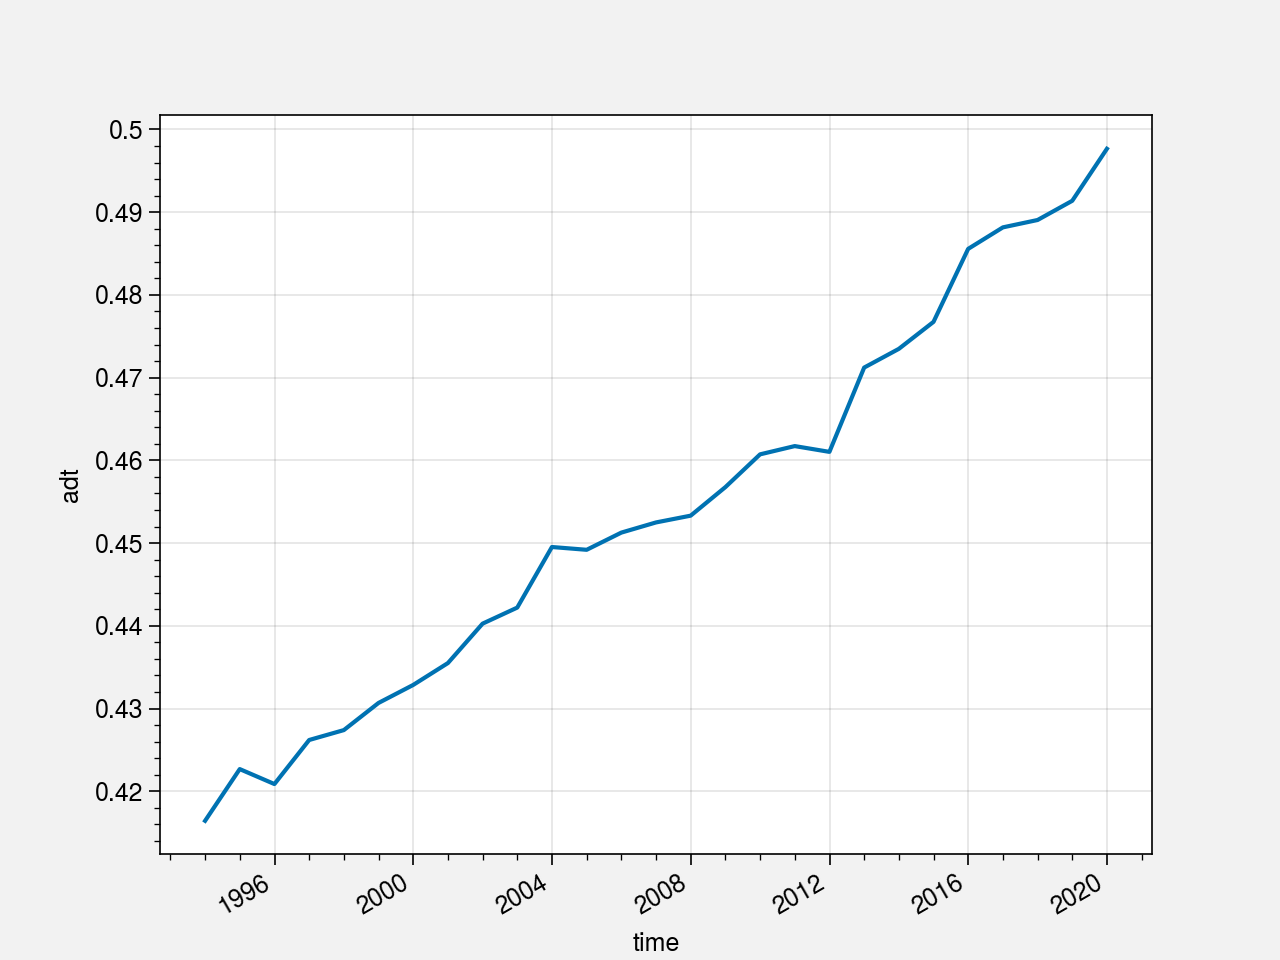

In [16]:
weight_ssh_obs = np.cos(np.deg2rad(ds_ssh_obs.latitude))
weight_ssh_obs.name = "weight_ssh_obs"
ssh_gl_av_obs = ds_ssh_obs.adt.weighted(weight_ssh_obs).mean(("longitude", "latitude")) # unit: m
ssh_gl_av_obs.plot()
ssh_gl_av_tr_obs, _, _, p_gl_av_obs, _ = stats.linregress(
            time1_yr_ssh, ssh_gl_av_obs)
print(ssh_gl_av_tr_obs*1000, p_gl_av_obs)
ssh_gl_av_obs

In [17]:
ssha_NA_obs = (ds_ssh_obs.adt - ssh_gl_av_obs).sel(latitude=slice(lat1_NA, lat2_NA),
                    longitude=slice(lon1_NA+360, lon2_NA+360))#.sel(time=slice('2005','2016'))
ssh_NA_obs = ds_ssh_obs.adt.sel(latitude=slice(lat1_NA, lat2_NA),
                    longitude=slice(lon1_NA+360, lon2_NA+360))#.sel(time=slice('2005','2016'))
ssha_NA_obs

<xarray.DataArray 'adt' (time: 27, latitude: 280, longitude: 400)>
array([[[ 0.29078362,  0.28900848,  0.2880191 , ...,         nan,
                 nan,         nan],
        [ 0.30089648,  0.29806098,  0.29612985, ...,         nan,
                 nan,         nan],
        [ 0.31019488,  0.30650073,  0.3034568 , ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ..., -0.74522594,
         -0.74708929, -0.74986469],
        [        nan,         nan,         nan, ..., -0.72746935,
         -0.73020049, -0.73415598],
        [        nan,         nan,         nan, ..., -0.72523271,
         -0.72918532, -0.73396241]],

       [[ 0.25588408,  0.25326537,  0.25065652, ...,         nan,
                 nan,         nan],
        [ 0.26599315,  0.26368228,  0.26133907, ...,         nan,
                 nan,         nan],
        [ 0.277099  ,  0.27581157,  0.27416071, ...,         nan,
                 nan,         nan],
...
        [        nan,         nan,         nan, ..., -0.76713304,
         -0.77172274, -0.77536683],
        [        nan,         nan,         nan, ..., -0.7455895 ,
         -0.75017045, -0.75391315],
        [        nan,         nan,         nan, ..., -0.73457748,
         -0.73994954, -0.74477149]],

       [[ 0.24165595,  0.23994011,  0.23819526, ...,         nan,
                 nan,         nan],
        [ 0.24801244,  0.2457675 ,  0.24339492, ...,         nan,
                 nan,         nan],
        [ 0.25581218,  0.25332573,  0.25029163, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ..., -0.72628941,
         -0.73239246, -0.7375605 ],
        [        nan,         nan,         nan, ..., -0.70682872,
         -0.71332429, -0.7190725 ],
        [        nan,         nan,         nan, ..., -0.70261438,
         -0.70959932, -0.71752532]]])
Coordinates:
  * time       (time) datetime64[ns] 1993-12-31 1994-12-31 ... 2019-12-31
  * latitude   (latitude) float32 10.12 10.38 10.62 10.88 ... 79.38 79.62 79.88
  * longitude  (longitude) float32 260.1 260.4 260.6 260.9 ... 359.4 359.6 359.9

In [18]:
%%time 
_, nlat_NA_obs, nlon_NA_obs = ssha_NA_obs.shape

ssh_tr_NA_obs = np.empty((nlat_NA_obs, nlon_NA_obs))
ssh_tr_NA_obs[:] = np.nan
p_NA_obs = np.empty((nlat_NA_obs, nlon_NA_obs))
p_NA_obs[:] = np.nan

for ilon in np.arange(0,nlon_NA_obs):
    for ilat in np.arange(0,nlat_NA_obs):
#         slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
        ssh_tr_NA_obs[ilat,ilon], _, _, p_NA_obs[ilat,ilon], _ = stats.linregress(
            time1_yr_ssh, ssh_NA_obs[:,ilat,ilon])
        
# px_NA_TLmCL = xr.DataArray(data=p_NA_TLmCL, dims=["nlon","nlat"])  
# px_NA_TLmCL

lon_NA_obs, lat_NA_obs = np.meshgrid(ssha_NA_obs.longitude, ssha_NA_obs.latitude)
latm_NA_obs = np.where(p_NA_obs>0.1, lat_NA_obs, np.nan) # m: mask
lonm_NA_obs = np.where(p_NA_obs>0.1, lon_NA_obs, np.nan) # m: mask

ssh_trm_NA_obs = np.where(p_NA_obs<0.1,ssh_tr_NA_obs, np.nan) # m: mask

CPU times: user 1min 51s, sys: 877 ms, total: 1min 52s
Wall time: 1min 52s


/scratch/group/ihesp/shared/conda/envs/envMar25/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in greater
/scratch/group/ihesp/shared/conda/envs/envMar25/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in greater
/scratch/group/ihesp/shared/conda/envs/envMar25/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in less


In [21]:
%%time 
_, nlat_NA_obs, nlon_NA_obs = ssha_NA_obs.shape

ssha_tr_NA_obs = np.empty((nlat_NA_obs, nlon_NA_obs))
ssha_tr_NA_obs[:] = np.nan
pa_NA_obs = np.empty((nlat_NA_obs, nlon_NA_obs))
pa_NA_obs[:] = np.nan

for ilon in np.arange(0,nlon_NA_obs):
    for ilat in np.arange(0,nlat_NA_obs):
#         slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
        ssha_tr_NA_obs[ilat,ilon], _, _, pa_NA_obs[ilat,ilon], _ = stats.linregress(
            time1_yr_ssh, ssha_NA_obs[:,ilat,ilon])
        
# px_NA_TLmCL = xr.DataArray(data=p_NA_TLmCL, dims=["nlon","nlat"])  
# px_NA_TLmCL

# lon_NA_obs, lat_NA_obs = np.meshgrid(ssha_NA_obs.longitude, ssha_NA_obs.latitude)
# latm_NA_obs = np.where(p_NA_obs>0.1, lat_NA_obs, np.nan) # m: mask
# lonm_NA_obs = np.where(p_NA_obs>0.1, lon_NA_obs, np.nan) # m: mask

ssha_trm_NA_obs = np.where(pa_NA_obs<0.1,ssha_tr_NA_obs, np.nan) # m: mask

CPU times: user 1min 50s, sys: 1.04 s, total: 1min 51s
Wall time: 1min 50s


/scratch/group/ihesp/shared/conda/envs/envMar25/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in less


# make pic

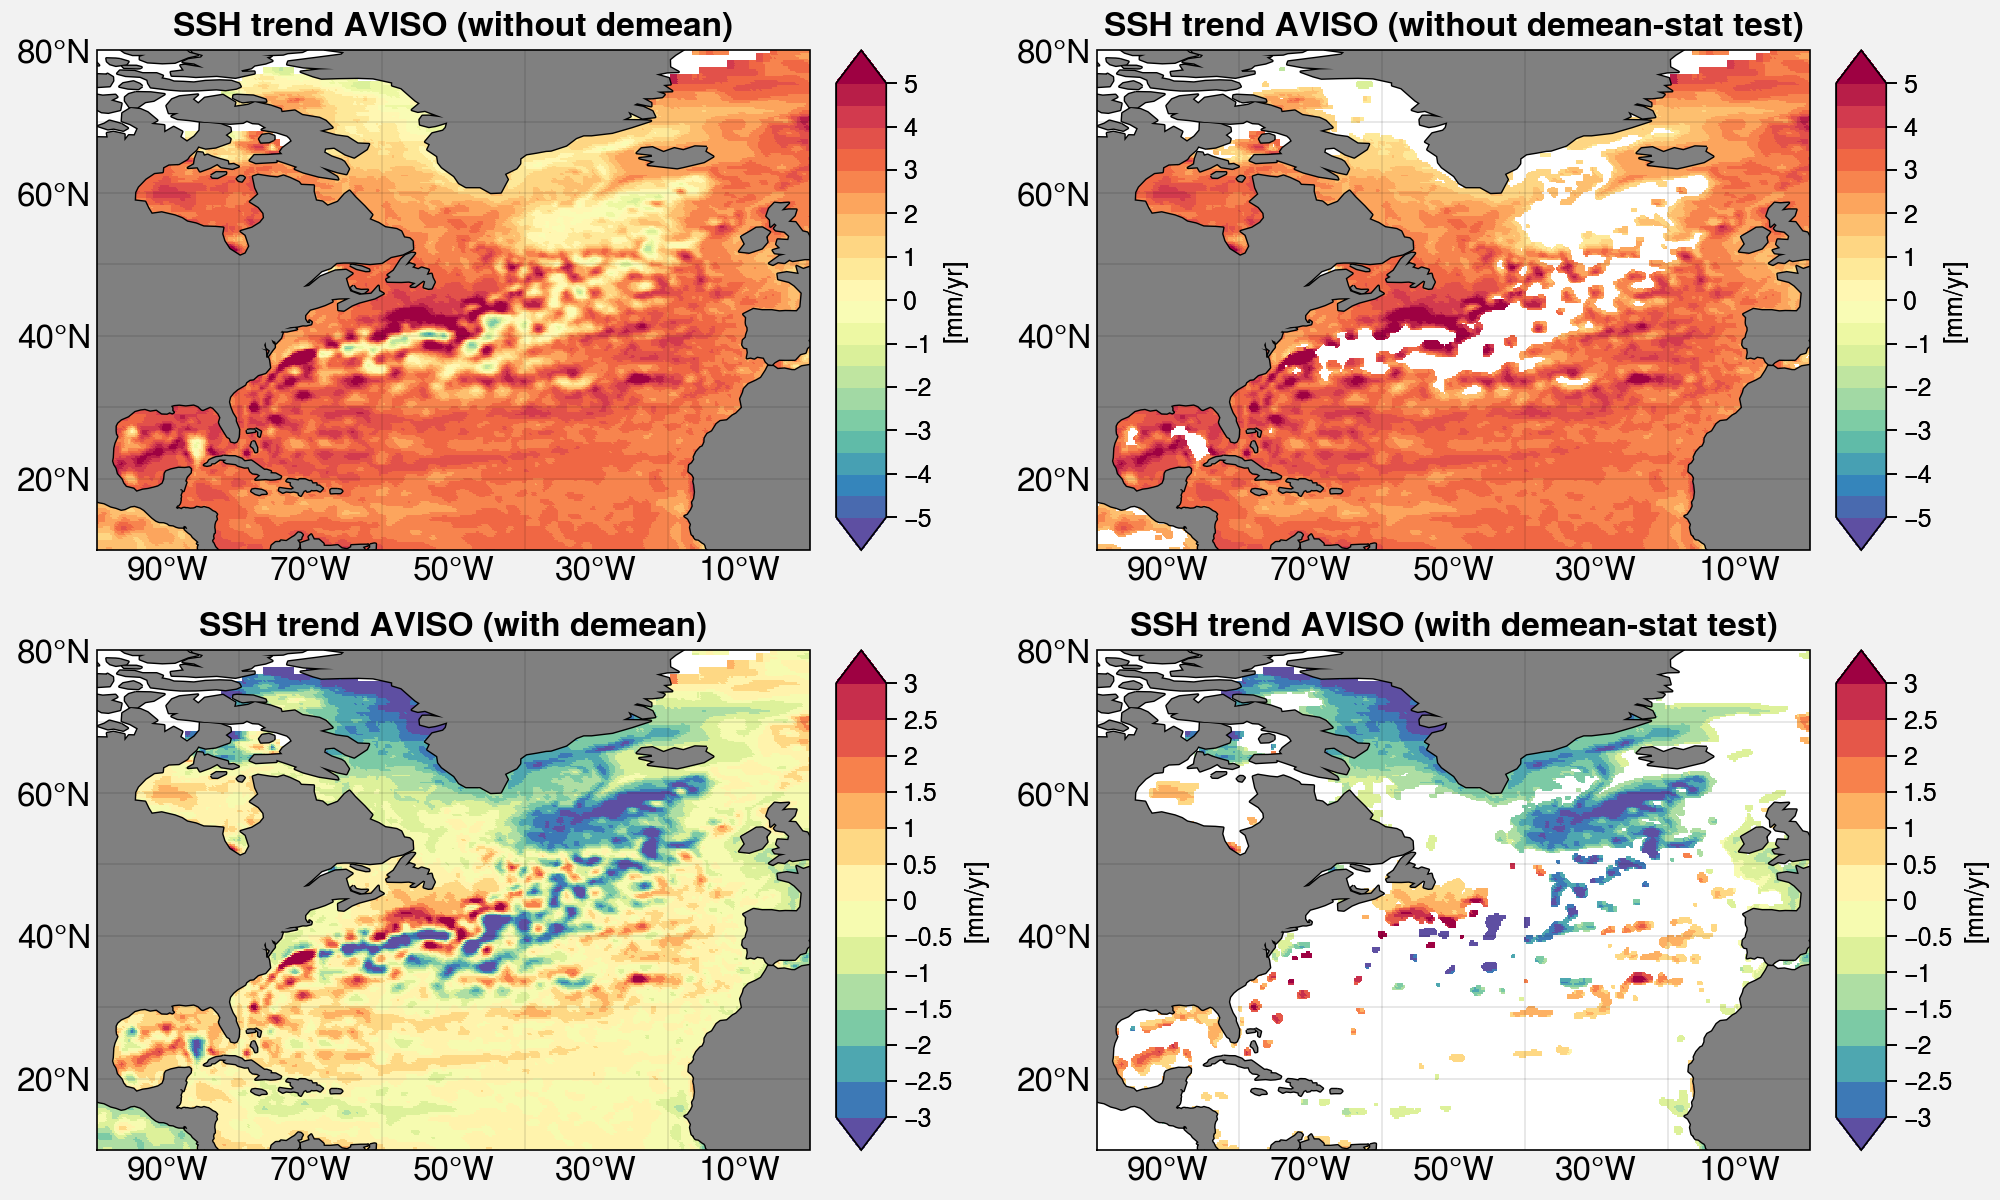

In [28]:
pc = cartopy.crs.PlateCarree()
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()

fig1, axs = plot.subplots(nrows=2,ncols=2,proj='cyl',width='10in',height='6in')

# axs[0,0].plot(time1_yr_ssh, ssh_gl_av_obs)

m00=axs[0,0].pcolormesh(ssha_NA_obs.longitude, ssha_NA_obs.latitude, 
        ssh_tr_NA_obs*1000, levels=np.arange(-5,5+0.1,0.5), transform=pc, 
        cmap="spectral_r", extend='both')
# cs10=axs[1,0].contour(ds_NA_g16.TLONG, ds_NA_g16.TLAT, 
#         ssh2AMOCm_NA_TLmCL, levels=[-1], transform=pc, color='r')
# axs[0,0].scatter(lonam_NA_obs, latam_NA_obs, 
#         s=0.1, color='k', marker='x', alpha=1)
# axs[1,0].plot(-71.1,42.2,transform=pc,marker='*',color='r',markersize=10)
# Boston (71.1W, 42.4N)
# axs[1,0].plot(-75.5,35.2,transform=pc,marker='*',color='b',markersize=10)
# Cape Hatters (75.5W, 35.2N)
axs[0,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,0].format(land=True, landcolor='grey')
axs[0,0].set_extent([lon1_NA, lon2_NA, lat1_NA, lat2_NA], crs=pc)
axs[0,0].set_xticks(np.arange(lon1_NA+10,lon2_NA+1,20), crs=pc)
axs[0,0].set_xticklabels(np.arange(lon1_NA+10,lon2_NA+1,20), fontsize=12)
axs[0,0].xaxis.set_major_formatter(lon_formatter)
axs[0,0].set_yticks(np.arange(lat1_NA+10,lat2_NA+1, 20), crs=pc)
axs[0,0].set_yticklabels(np.arange(lat1_NA+10,lat2_NA+1, 20), fontsize=12)
axs[0,0].yaxis.set_major_formatter(lat_formatter)
axs[0,0].set_title('SSH trend AVISO (without demean)', fontsize=12, fontweight='bold')
# axs[0,0].text(-98, 55, 'c', transform=pc, fontsize=12, fontweight='bold')
cb = axs[0,0].colorbar(m00, loc='r', label='[mm/yr]', extend='both', width='2em',shrink=1)

m01=axs[0,1].pcolormesh(ssha_NA_obs.longitude, ssha_NA_obs.latitude, 
        ssh_trm_NA_obs*1000, levels=np.arange(-5,5+0.1,0.5), transform=pc, 
        cmap="spectral_r", extend='both')
# cs10=axs[1,0].contour(ds_NA_g16.TLONG, ds_NA_g16.TLAT, 
#         ssh2AMOCm_NA_TLmCL, levels=[-1], transform=pc, color='r')
# axs[0,1].scatter(lonm_NA_obs, latm_NA_obs, 
#         s=0.1, color='k', marker='x', alpha=1)
# axs[1,0].plot(-71.1,42.2,transform=pc,marker='*',color='r',markersize=10)
# Boston (71.1W, 42.4N)
# axs[1,0].plot(-75.5,35.2,transform=pc,marker='*',color='b',markersize=10)
# Cape Hatters (75.5W, 35.2N)
axs[0,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,1].format(land=True, landcolor='grey')
axs[0,1].set_extent([lon1_NA, lon2_NA, lat1_NA, lat2_NA], crs=pc)
axs[0,1].set_xticks(np.arange(lon1_NA+10,lon2_NA+1,20), crs=pc)
axs[0,1].set_xticklabels(np.arange(lon1_NA+10,lon2_NA+1,20), fontsize=12)
axs[0,1].xaxis.set_major_formatter(lon_formatter)
axs[0,1].set_yticks(np.arange(lat1_NA+10,lat2_NA+1, 20), crs=pc)
axs[0,1].set_yticklabels(np.arange(lat1_NA+10,lat2_NA+1, 20), fontsize=12)
axs[0,1].yaxis.set_major_formatter(lat_formatter)
axs[0,1].set_title('SSH trend AVISO (without demean-stat test)', fontsize=12, fontweight='bold')
# axs[0,0].text(-98, 55, 'c', transform=pc, fontsize=12, fontweight='bold')
cb = axs[0,1].colorbar(m01, loc='r', label='[mm/yr]', extend='both', width='2em',shrink=1)

m10=axs[1,0].pcolormesh(ssha_NA_obs.longitude, ssha_NA_obs.latitude, 
        ssha_tr_NA_obs*1000, levels=np.arange(-3,3+0.1,0.5), transform=pc, 
        cmap="spectral_r", extend='both')
# cs10=axs[1,0].contour(ds_NA_g16.TLONG, ds_NA_g16.TLAT, 
#         ssh2AMOCm_NA_TLmCL, levels=[-1], transform=pc, color='r')
# axs[1,0].scatter(lonm_NA_obs, latm_NA_obs, 
#         s=0.1, color='k', marker='x', alpha=1)
# axs[1,0].plot(-71.1,42.2,transform=pc,marker='*',color='r',markersize=10)
# Boston (71.1W, 42.4N)
# axs[1,0].plot(-75.5,35.2,transform=pc,marker='*',color='b',markersize=10)
# Cape Hatters (75.5W, 35.2N)
axs[1,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[1,0].format(land=True, landcolor='grey')
axs[1,0].set_extent([lon1_NA, lon2_NA, lat1_NA, lat2_NA], crs=pc)
axs[1,0].set_xticks(np.arange(lon1_NA+10,lon2_NA+1,20), crs=pc)
axs[1,0].set_xticklabels(np.arange(lon1_NA+10,lon2_NA+1,20), fontsize=12)
axs[1,0].xaxis.set_major_formatter(lon_formatter)
axs[1,0].set_yticks(np.arange(lat1_NA+10,lat2_NA+1, 20), crs=pc)
axs[1,0].set_yticklabels(np.arange(lat1_NA+10,lat2_NA+1, 20), fontsize=12)
axs[1,0].yaxis.set_major_formatter(lat_formatter)
axs[1,0].set_title('SSH trend AVISO (with demean)', fontsize=12, fontweight='bold')
# axs[0,0].text(-98, 55, 'c', transform=pc, fontsize=12, fontweight='bold')
cb = axs[1,0].colorbar(m10, loc='r', label='[mm/yr]', extend='both', width='2em',shrink=1)

m11=axs[1,1].pcolormesh(ssha_NA_obs.longitude, ssha_NA_obs.latitude, 
        ssha_trm_NA_obs*1000, levels=np.arange(-3,3+0.1,0.5), transform=pc, 
        cmap="spectral_r", extend='both')
# cs10=axs[1,0].contour(ds_NA_g16.TLONG, ds_NA_g16.TLAT, 
#         ssh2AMOCm_NA_TLmCL, levels=[-1], transform=pc, color='r')
# axs[1,1].scatter(lonm_NA_obs, latm_NA_obs, 
#         s=0.1, color='k', marker='x', alpha=1)
# axs[1,0].plot(-71.1,42.2,transform=pc,marker='*',color='r',markersize=10)
# Boston (71.1W, 42.4N)
# axs[1,0].plot(-75.5,35.2,transform=pc,marker='*',color='b',markersize=10)
# Cape Hatters (75.5W, 35.2N)
axs[1,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[1,1].format(land=True, landcolor='grey')
axs[1,1].set_extent([lon1_NA, lon2_NA, lat1_NA, lat2_NA], crs=pc)
axs[1,1].set_xticks(np.arange(lon1_NA+10,lon2_NA+1,20), crs=pc)
axs[1,1].set_xticklabels(np.arange(lon1_NA+10,lon2_NA+1,20), fontsize=12)
axs[1,1].xaxis.set_major_formatter(lon_formatter)
axs[1,1].set_yticks(np.arange(lat1_NA+10,lat2_NA+1, 20), crs=pc)
axs[1,1].set_yticklabels(np.arange(lat1_NA+10,lat2_NA+1, 20), fontsize=12)
axs[1,1].yaxis.set_major_formatter(lat_formatter)
axs[1,1].set_title('SSH trend AVISO (with demean-stat test)', fontsize=12, fontweight='bold')
# axs[0,0].text(-98, 55, 'c', transform=pc, fontsize=12, fontweight='bold')
cb = axs[1,1].colorbar(m11, loc='r', label='[mm/yr]', extend='both', width='2em',shrink=1)

fig1.savefig(pic1, bbox_inches='tight')

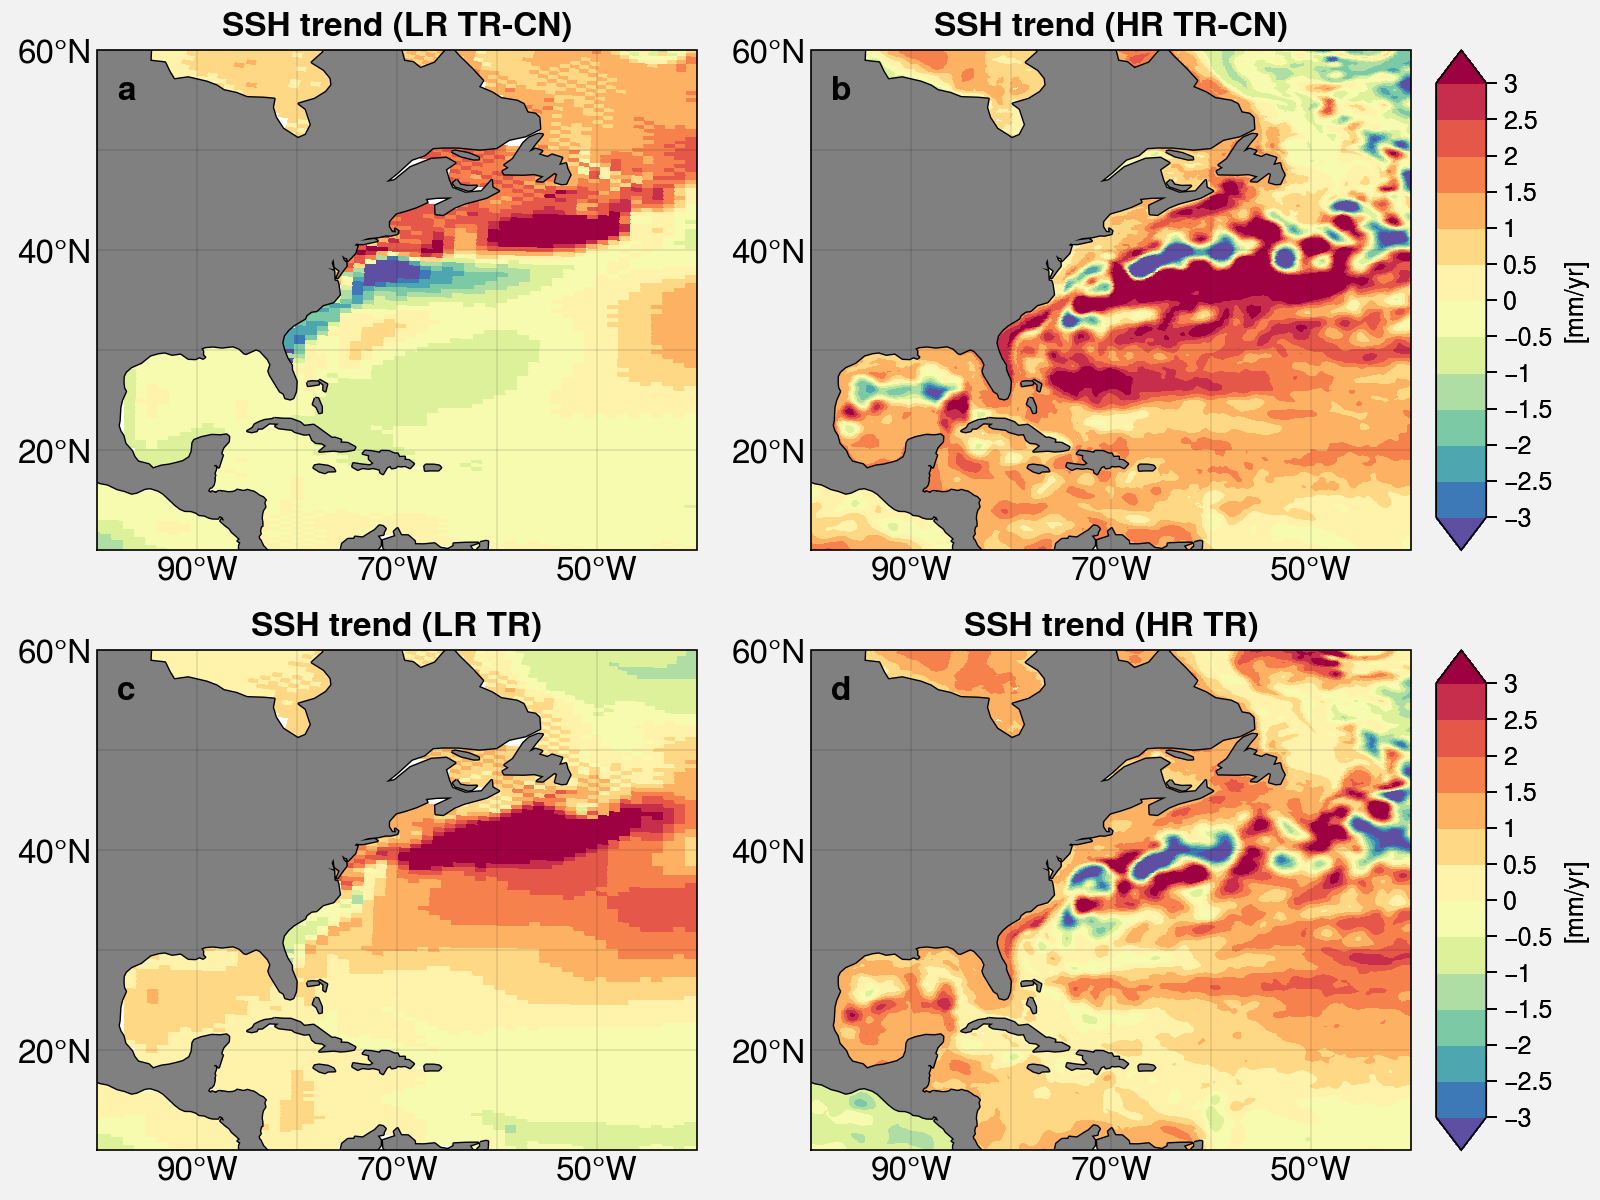

In [36]:
pc = cartopy.crs.PlateCarree()
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()

fig2, axs = plot.subplots(nrows=2,ncols=2,proj='cyl',width='8in',height='6in')


# row 1: regress ssh to amoc
m00=axs[0,0].pcolormesh(ds_NA_g16.TLONG, ds_NA_g16.TLAT, 
        ssh_tr_NA_TLmCL*10, levels=np.arange(-3,3+0.1,0.5), transform=pc, 
        cmap="spectral_r", extend='both')
# cs10=axs[1,0].contour(ds_NA_g16.TLONG, ds_NA_g16.TLAT, 
#         ssh2AMOCm_NA_TLmCL, levels=[-1], transform=pc, color='r')
# axs[0,0].scatter(lonm_NA_g16, latm_NA_g16, 
#         s=5, color='k', marker='x', alpha=0.5)
# axs[1,0].plot(-71.1,42.2,transform=pc,marker='*',color='r',markersize=10)
# Boston (71.1W, 42.4N)
# axs[1,0].plot(-75.5,35.2,transform=pc,marker='*',color='b',markersize=10)
# Cape Hatters (75.5W, 35.2N)
axs[0,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,0].format(land=True, landcolor='grey')
axs[0,0].set_extent([lon1_NA, lon2_NA, lat1_NA, lat2_NA], crs=pc)
axs[0,0].set_xticks(np.arange(lon1_NA+10,lon2_NA+1,20), crs=pc)
axs[0,0].set_xticklabels(np.arange(lon1_NA+10,lon2_NA+1,20), fontsize=12)
axs[0,0].xaxis.set_major_formatter(lon_formatter)
axs[0,0].set_yticks(np.arange(lat1_NA+10,lat2_NA+1, 20), crs=pc)
axs[0,0].set_yticklabels(np.arange(lat1_NA+10,lat2_NA+1, 20), fontsize=12)
axs[0,0].yaxis.set_major_formatter(lat_formatter)
axs[0,0].set_title('SSH trend (LR TR-CN)', fontsize=12, fontweight='bold')
axs[0,0].text(-98, 55, 'a', transform=pc, fontsize=12, fontweight='bold')


m01=axs[0,1].pcolormesh(ds_NA_t12.TLONG, ds_NA_t12.TLAT,
        ssh_tr_NA_THmCH*10, levels=np.arange(-3,3+0.1,0.5), transform=pc, 
        cmap="spectral_r", extend='both')
# cs11=axs[1,1].contour(ds_NA_t12.TLONG, ds_NA_t12.TLAT, 
#         ssh2AMOCm_NA_THmCH, levels=[-1], transform=pc, color='r')
# axs[1,1].scatter(lonm_NA_t12, latm_NA_t12, s=1, color='k', marker='x', alpha=0.4)
# axs[1,1].plot(-71.1,42.2,transform=pc,marker='*',color='r',markersize=10)
# Boston (71.1W, 42.4N)
# axs[1,1].plot(-75.5,35.2,transform=pc,marker='*',color='b',markersize=10)
# Cape Hatters (75.5W, 35.2N)
axs[0,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,1].format(land=True, landcolor='grey')
axs[0,1].set_extent([lon1_NA, lon2_NA, lat1_NA, lat2_NA], crs=pc)
axs[0,1].set_xticks(np.arange(lon1_NA+10,lon2_NA+1,20), crs=pc)
axs[0,1].set_xticklabels(np.arange(lon1_NA+10,lon2_NA+1,20), fontsize=12)
axs[0,1].xaxis.set_major_formatter(lon_formatter)
axs[0,1].set_yticks(np.arange(lat1_NA+10,lat2_NA+1, 20), crs=pc)
axs[0,1].set_yticklabels(np.arange(lat1_NA+10,lat2_NA+1, 20), fontsize=12)
axs[0,1].yaxis.set_major_formatter(lat_formatter)
axs[0,1].set_title('SSH trend (HR TR-CN)', fontsize=12, fontweight='bold')
axs[0,1].text(-98, 55, 'b', transform=pc, fontsize=12, fontweight='bold')
cb = axs[0,1].colorbar(m01,loc='r',label='[mm/yr]',extend='both',width='2em',shrink=1)

# row 1: regress ssh to amoc
m10=axs[1,0].pcolormesh(ds_NA_g16.TLONG, ds_NA_g16.TLAT, 
        ssh_tr_NA_TL*10, levels=np.arange(-3,3+0.1,0.5), transform=pc, 
        cmap="spectral_r", extend='both')
# cs10=axs[1,0].contour(ds_NA_g16.TLONG, ds_NA_g16.TLAT, 
#         ssh2AMOCm_NA_TLmCL, levels=[-1], transform=pc, color='r')
# axs[0,0].scatter(lonm_NA_g16, latm_NA_g16, 
#         s=5, color='k', marker='x', alpha=0.5)
# axs[1,0].plot(-71.1,42.2,transform=pc,marker='*',color='r',markersize=10)
# Boston (71.1W, 42.4N)
# axs[1,0].plot(-75.5,35.2,transform=pc,marker='*',color='b',markersize=10)
# Cape Hatters (75.5W, 35.2N)
axs[1,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[1,0].format(land=True, landcolor='grey')
axs[1,0].set_extent([lon1_NA, lon2_NA, lat1_NA, lat2_NA], crs=pc)
axs[1,0].set_xticks(np.arange(lon1_NA+10,lon2_NA+1,20), crs=pc)
axs[1,0].set_xticklabels(np.arange(lon1_NA+10,lon2_NA+1,20), fontsize=12)
axs[1,0].xaxis.set_major_formatter(lon_formatter)
axs[1,0].set_yticks(np.arange(lat1_NA+10,lat2_NA+1, 20), crs=pc)
axs[1,0].set_yticklabels(np.arange(lat1_NA+10,lat2_NA+1, 20), fontsize=12)
axs[1,0].yaxis.set_major_formatter(lat_formatter)
axs[1,0].set_title('SSH trend (LR TR)', fontsize=12, fontweight='bold')
axs[1,0].text(-98, 55, 'c', transform=pc, fontsize=12, fontweight='bold')


m11=axs[1,1].pcolormesh(ds_NA_t12.TLONG, ds_NA_t12.TLAT,
        ssh_tr_NA_TH*10, levels=np.arange(-3,3+0.1,0.5), transform=pc, 
        cmap="spectral_r", extend='both')
# cs11=axs[1,1].contour(ds_NA_t12.TLONG, ds_NA_t12.TLAT, 
#         ssh2AMOCm_NA_THmCH, levels=[-1], transform=pc, color='r')
# axs[1,1].scatter(lonm_NA_t12, latm_NA_t12, s=1, color='k', marker='x', alpha=0.4)
# axs[1,1].plot(-71.1,42.2,transform=pc,marker='*',color='r',markersize=10)
# Boston (71.1W, 42.4N)
# axs[1,1].plot(-75.5,35.2,transform=pc,marker='*',color='b',markersize=10)
# Cape Hatters (75.5W, 35.2N)
axs[1,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[1,1].format(land=True, landcolor='grey')
axs[1,1].set_extent([lon1_NA, lon2_NA, lat1_NA, lat2_NA], crs=pc)
axs[1,1].set_xticks(np.arange(lon1_NA+10,lon2_NA+1,20), crs=pc)
axs[1,1].set_xticklabels(np.arange(lon1_NA+10,lon2_NA+1,20), fontsize=12)
axs[1,1].xaxis.set_major_formatter(lon_formatter)
axs[1,1].set_yticks(np.arange(lat1_NA+10,lat2_NA+1, 20), crs=pc)
axs[1,1].set_yticklabels(np.arange(lat1_NA+10,lat2_NA+1, 20), fontsize=12)
axs[1,1].yaxis.set_major_formatter(lat_formatter)
axs[1,1].set_title('SSH trend (HR TR)', fontsize=12, fontweight='bold')
axs[1,1].text(-98, 55, 'd', transform=pc, fontsize=12, fontweight='bold')
cb = axs[1,1].colorbar(m11,loc='r',label='[mm/yr]',extend='both',width='2em',shrink=1)

# m20=axs[2,0].pcolormesh(ssha_NA_obs.longitude, ssha_NA_obs.latitude, 
#         ssh_trm_NA_obs*1000, levels=np.arange(-3,3+0.1,0.5), transform=pc, 
#         cmap="bwr", extend='both')
# # cs10=axs[1,0].contour(ds_NA_g16.TLONG, ds_NA_g16.TLAT, 
# #         ssh2AMOCm_NA_TLmCL, levels=[-1], transform=pc, color='r')
# # axs[0,0].scatter(lonm_NA_obs, latm_NA_obs, 
# #         s=5, color='k', marker='x', alpha=0.5)
# # axs[1,0].plot(-71.1,42.2,transform=pc,marker='*',color='r',markersize=10)
# # Boston (71.1W, 42.4N)
# # axs[1,0].plot(-75.5,35.2,transform=pc,marker='*',color='b',markersize=10)
# # Cape Hatters (75.5W, 35.2N)
# axs[2,0].coastlines(resolution='110m', color='black', linewidth=1)
# axs[2,0].format(land=True, landcolor='grey')
# axs[2,0].set_extent([lon1_NA, lon2_NA, lat1_NA, lat2_NA], crs=pc)
# axs[2,0].set_xticks(np.arange(lon1_NA+10,lon2_NA+1,20), crs=pc)
# axs[2,0].set_xticklabels(np.arange(lon1_NA+10,lon2_NA+1,20), fontsize=12)
# axs[2,0].xaxis.set_major_formatter(lon_formatter)
# axs[2,0].set_yticks(np.arange(lat1_NA+10,lat2_NA+1, 20), crs=pc)
# axs[2,0].set_yticklabels(np.arange(lat1_NA+10,lat2_NA+1, 20), fontsize=12)
# axs[2,0].yaxis.set_major_formatter(lat_formatter)
# axs[2,0].set_title('SSH regression obs', fontsize=12, fontweight='bold')
# axs[2,0].text(-98, 55, 'c', transform=pc, fontsize=12, fontweight='bold')

# m21=axs[2,1].pcolormesh(ssha_NA_obs.longitude, ssha_NA_obs.latitude, 
#         p_NA_obs, levels=np.arange(0,0.2+0.01,0.05), transform=pc, 
#         cmap="reds", extend='both')
# # cs10=axs[1,0].contour(ds_NA_g16.TLONG, ds_NA_g16.TLAT, 
# #         ssh2AMOCm_NA_TLmCL, levels=[-1], transform=pc, color='r')
# # axs[0,0].scatter(lonm_NA_g16, latm_NA_g16, 
# #         s=5, color='k', marker='x', alpha=0.5)
# # axs[1,0].plot(-71.1,42.2,transform=pc,marker='*',color='r',markersize=10)
# # Boston (71.1W, 42.4N)
# # axs[1,0].plot(-75.5,35.2,transform=pc,marker='*',color='b',markersize=10)
# # Cape Hatters (75.5W, 35.2N)
# axs[2,1].coastlines(resolution='110m', color='black', linewidth=1)
# axs[2,1].format(land=True, landcolor='grey')
# axs[2,1].set_extent([lon1_NA, lon2_NA, lat1_NA, lat2_NA], crs=pc)
# axs[2,1].set_xticks(np.arange(lon1_NA+10,lon2_NA+1,20), crs=pc)
# axs[2,1].set_xticklabels(np.arange(lon1_NA+10,lon2_NA+1,20), fontsize=12)
# axs[2,1].xaxis.set_major_formatter(lon_formatter)
# axs[2,1].set_yticks(np.arange(lat1_NA+10,lat2_NA+1, 20), crs=pc)
# axs[2,1].set_yticklabels(np.arange(lat1_NA+10,lat2_NA+1, 20), fontsize=12)
# axs[2,1].yaxis.set_major_formatter(lat_formatter)
# axs[2,1].set_title('SSH regression obs', fontsize=12, fontweight='bold')
# axs[2,1].text(-98, 55, 'c', transform=pc, fontsize=12, fontweight='bold')
# cb = axs[2,1].colorbar(m21,loc='r',label='[mm/yr]',extend='both',width='2em',shrink=1)

fig2.savefig(pic2, bbox_inches='tight')

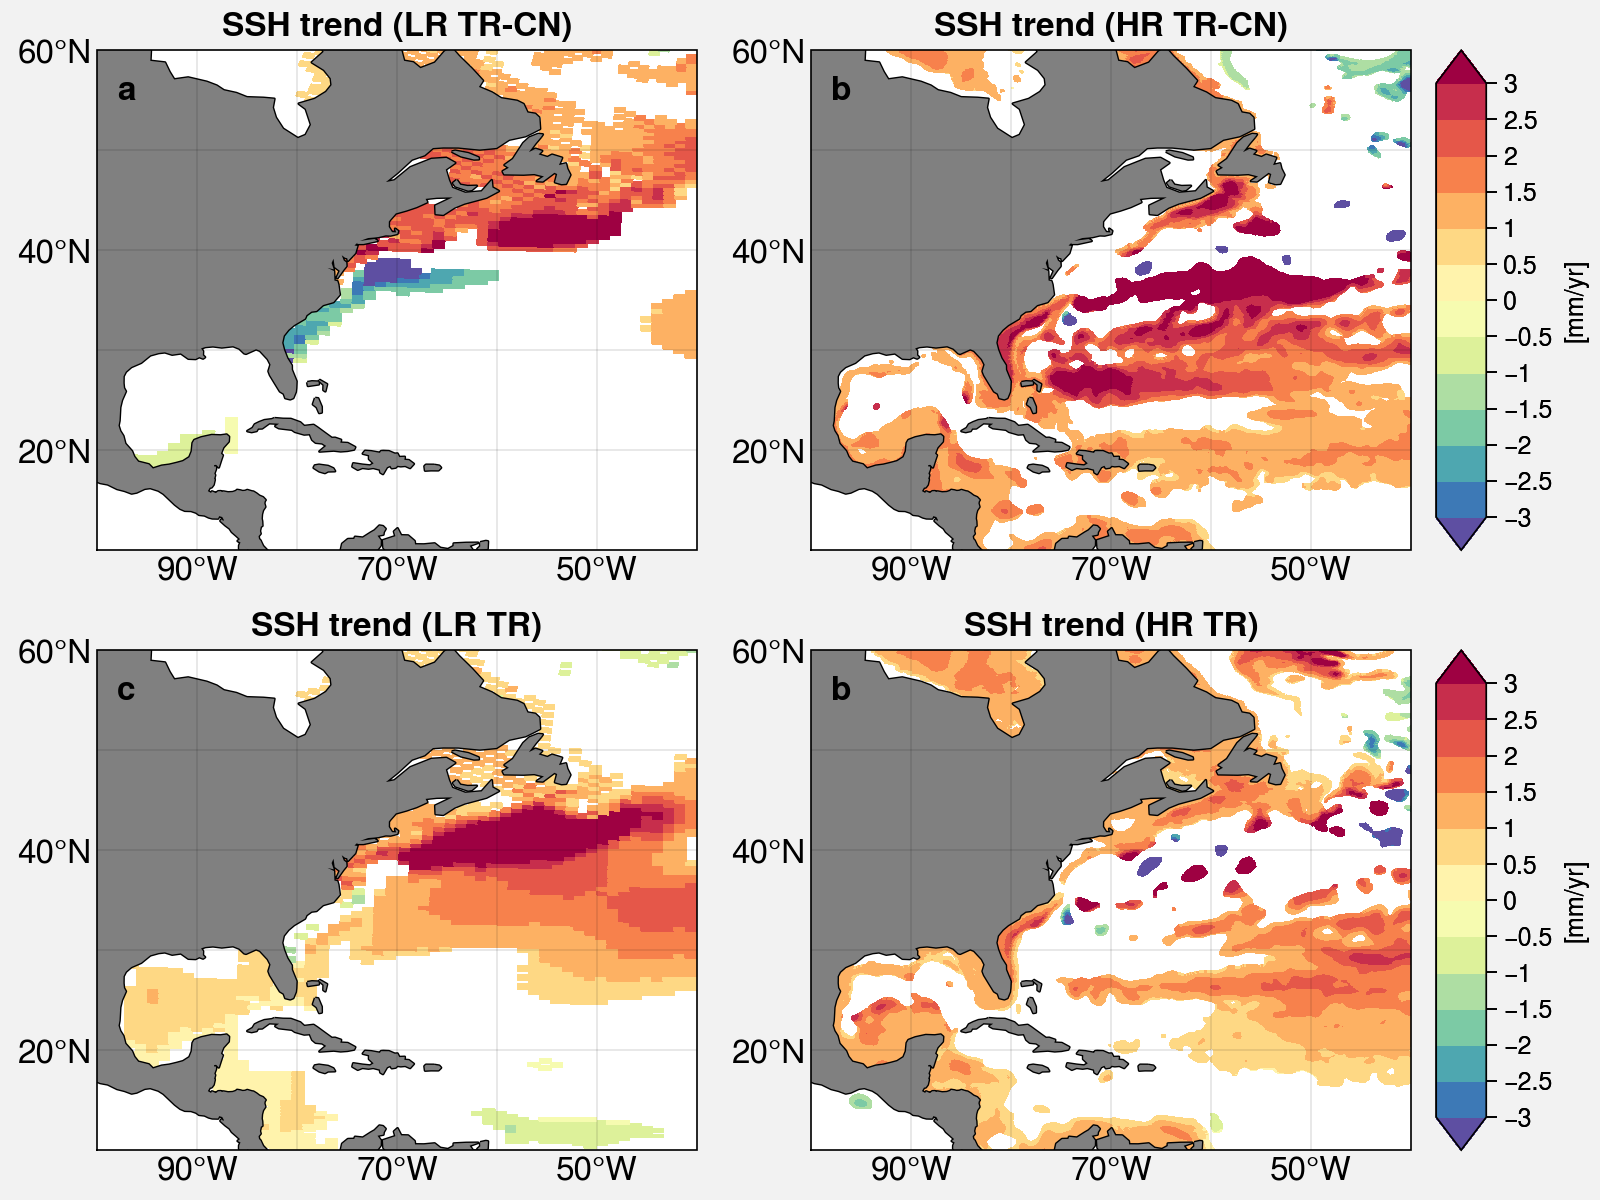

In [39]:
pc = cartopy.crs.PlateCarree()
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()

fig3, axs = plot.subplots(nrows=2,ncols=2,proj='cyl',width='8in',height='6in')


# row 1: regress ssh to amoc
m00=axs[0,0].pcolormesh(ds_NA_g16.TLONG, ds_NA_g16.TLAT, 
        ssh_trm_NA_TLmCL*10, levels=np.arange(-3,3+0.1,0.5), transform=pc, 
        cmap="spectral_r", extend='both')
# cs10=axs[1,0].contour(ds_NA_g16.TLONG, ds_NA_g16.TLAT, 
#         ssh2AMOCm_NA_TLmCL, levels=[-1], transform=pc, color='r')
# axs[0,0].scatter(lonm_NA_g16, latm_NA_g16, 
#         s=5, color='k', marker='x', alpha=0.5)
# axs[1,0].plot(-71.1,42.2,transform=pc,marker='*',color='r',markersize=10)
# Boston (71.1W, 42.4N)
# axs[1,0].plot(-75.5,35.2,transform=pc,marker='*',color='b',markersize=10)
# Cape Hatters (75.5W, 35.2N)
axs[0,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,0].format(land=True, landcolor='grey')
axs[0,0].set_extent([lon1_NA, lon2_NA, lat1_NA, lat2_NA], crs=pc)
axs[0,0].set_xticks(np.arange(lon1_NA+10,lon2_NA+1,20), crs=pc)
axs[0,0].set_xticklabels(np.arange(lon1_NA+10,lon2_NA+1,20), fontsize=12)
axs[0,0].xaxis.set_major_formatter(lon_formatter)
axs[0,0].set_yticks(np.arange(lat1_NA+10,lat2_NA+1, 20), crs=pc)
axs[0,0].set_yticklabels(np.arange(lat1_NA+10,lat2_NA+1, 20), fontsize=12)
axs[0,0].yaxis.set_major_formatter(lat_formatter)
axs[0,0].set_title('SSH trend (LR TR-CN)', fontsize=12, fontweight='bold')
axs[0,0].text(-98, 55, 'a', transform=pc, fontsize=12, fontweight='bold')


m01=axs[0,1].pcolormesh(ds_NA_t12.TLONG, ds_NA_t12.TLAT,
        ssh_trm_NA_THmCH*10, levels=np.arange(-3,3+0.1,0.5), transform=pc, 
        cmap="spectral_r", extend='both')
# cs11=axs[1,1].contour(ds_NA_t12.TLONG, ds_NA_t12.TLAT, 
#         ssh2AMOCm_NA_THmCH, levels=[-1], transform=pc, color='r')
# axs[1,1].scatter(lonm_NA_t12, latm_NA_t12, s=1, color='k', marker='x', alpha=0.4)
# axs[1,1].plot(-71.1,42.2,transform=pc,marker='*',color='r',markersize=10)
# Boston (71.1W, 42.4N)
# axs[1,1].plot(-75.5,35.2,transform=pc,marker='*',color='b',markersize=10)
# Cape Hatters (75.5W, 35.2N)
axs[0,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,1].format(land=True, landcolor='grey')
axs[0,1].set_extent([lon1_NA, lon2_NA, lat1_NA, lat2_NA], crs=pc)
axs[0,1].set_xticks(np.arange(lon1_NA+10,lon2_NA+1,20), crs=pc)
axs[0,1].set_xticklabels(np.arange(lon1_NA+10,lon2_NA+1,20), fontsize=12)
axs[0,1].xaxis.set_major_formatter(lon_formatter)
axs[0,1].set_yticks(np.arange(lat1_NA+10,lat2_NA+1, 20), crs=pc)
axs[0,1].set_yticklabels(np.arange(lat1_NA+10,lat2_NA+1, 20), fontsize=12)
axs[0,1].yaxis.set_major_formatter(lat_formatter)
axs[0,1].set_title('SSH trend (HR TR-CN)', fontsize=12, fontweight='bold')
axs[0,1].text(-98, 55, 'b', transform=pc, fontsize=12, fontweight='bold')
cb = axs[0,1].colorbar(m01,loc='r',label='[mm/yr]',extend='both',width='2em',shrink=1)

# row 1: regress ssh to amoc
m10=axs[1,0].pcolormesh(ds_NA_g16.TLONG, ds_NA_g16.TLAT, 
        ssh_trm_NA_TL*10, levels=np.arange(-3,3+0.1,0.5), transform=pc, 
        cmap="spectral_r", extend='both')
# cs10=axs[1,0].contour(ds_NA_g16.TLONG, ds_NA_g16.TLAT, 
#         ssh2AMOCm_NA_TLmCL, levels=[-1], transform=pc, color='r')
# axs[0,0].scatter(lonm_NA_g16, latm_NA_g16, 
#         s=5, color='k', marker='x', alpha=0.5)
# axs[1,0].plot(-71.1,42.2,transform=pc,marker='*',color='r',markersize=10)
# Boston (71.1W, 42.4N)
# axs[1,0].plot(-75.5,35.2,transform=pc,marker='*',color='b',markersize=10)
# Cape Hatters (75.5W, 35.2N)
axs[1,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[1,0].format(land=True, landcolor='grey')
axs[1,0].set_extent([lon1_NA, lon2_NA, lat1_NA, lat2_NA], crs=pc)
axs[1,0].set_xticks(np.arange(lon1_NA+10,lon2_NA+1,20), crs=pc)
axs[1,0].set_xticklabels(np.arange(lon1_NA+10,lon2_NA+1,20), fontsize=12)
axs[1,0].xaxis.set_major_formatter(lon_formatter)
axs[1,0].set_yticks(np.arange(lat1_NA+10,lat2_NA+1, 20), crs=pc)
axs[1,0].set_yticklabels(np.arange(lat1_NA+10,lat2_NA+1, 20), fontsize=12)
axs[1,0].yaxis.set_major_formatter(lat_formatter)
axs[1,0].set_title('SSH trend (LR TR)', fontsize=12, fontweight='bold')
axs[1,0].text(-98, 55, 'c', transform=pc, fontsize=12, fontweight='bold')


m11=axs[1,1].pcolormesh(ds_NA_t12.TLONG, ds_NA_t12.TLAT,
        ssh_trm_NA_TH*10, levels=np.arange(-3,3+0.1,0.5), transform=pc, 
        cmap="spectral_r", extend='both')
# cs11=axs[1,1].contour(ds_NA_t12.TLONG, ds_NA_t12.TLAT, 
#         ssh2AMOCm_NA_THmCH, levels=[-1], transform=pc, color='r')
# axs[1,1].scatter(lonm_NA_t12, latm_NA_t12, s=1, color='k', marker='x', alpha=0.4)
# axs[1,1].plot(-71.1,42.2,transform=pc,marker='*',color='r',markersize=10)
# Boston (71.1W, 42.4N)
# axs[1,1].plot(-75.5,35.2,transform=pc,marker='*',color='b',markersize=10)
# Cape Hatters (75.5W, 35.2N)
axs[1,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[1,1].format(land=True, landcolor='grey')
axs[1,1].set_extent([lon1_NA, lon2_NA, lat1_NA, lat2_NA], crs=pc)
axs[1,1].set_xticks(np.arange(lon1_NA+10,lon2_NA+1,20), crs=pc)
axs[1,1].set_xticklabels(np.arange(lon1_NA+10,lon2_NA+1,20), fontsize=12)
axs[1,1].xaxis.set_major_formatter(lon_formatter)
axs[1,1].set_yticks(np.arange(lat1_NA+10,lat2_NA+1, 20), crs=pc)
axs[1,1].set_yticklabels(np.arange(lat1_NA+10,lat2_NA+1, 20), fontsize=12)
axs[1,1].yaxis.set_major_formatter(lat_formatter)
axs[1,1].set_title('SSH trend (HR TR)', fontsize=12, fontweight='bold')
axs[1,1].text(-98, 55, 'b', transform=pc, fontsize=12, fontweight='bold')
cb = axs[1,1].colorbar(m11,loc='r',label='[mm/yr]',extend='both',width='2em',shrink=1)

# m20=axs[2,0].pcolormesh(ssha_NA_obs.longitude, ssha_NA_obs.latitude, 
#         ssh_trm_NA_obs*1000, levels=np.arange(-3,3+0.1,0.5), transform=pc, 
#         cmap="bwr", extend='both')
# # cs10=axs[1,0].contour(ds_NA_g16.TLONG, ds_NA_g16.TLAT, 
# #         ssh2AMOCm_NA_TLmCL, levels=[-1], transform=pc, color='r')
# # axs[0,0].scatter(lonm_NA_obs, latm_NA_obs, 
# #         s=5, color='k', marker='x', alpha=0.5)
# # axs[1,0].plot(-71.1,42.2,transform=pc,marker='*',color='r',markersize=10)
# # Boston (71.1W, 42.4N)
# # axs[1,0].plot(-75.5,35.2,transform=pc,marker='*',color='b',markersize=10)
# # Cape Hatters (75.5W, 35.2N)
# axs[2,0].coastlines(resolution='110m', color='black', linewidth=1)
# axs[2,0].format(land=True, landcolor='grey')
# axs[2,0].set_extent([lon1_NA, lon2_NA, lat1_NA, lat2_NA], crs=pc)
# axs[2,0].set_xticks(np.arange(lon1_NA+10,lon2_NA+1,20), crs=pc)
# axs[2,0].set_xticklabels(np.arange(lon1_NA+10,lon2_NA+1,20), fontsize=12)
# axs[2,0].xaxis.set_major_formatter(lon_formatter)
# axs[2,0].set_yticks(np.arange(lat1_NA+10,lat2_NA+1, 20), crs=pc)
# axs[2,0].set_yticklabels(np.arange(lat1_NA+10,lat2_NA+1, 20), fontsize=12)
# axs[2,0].yaxis.set_major_formatter(lat_formatter)
# axs[2,0].set_title('SSH regression obs', fontsize=12, fontweight='bold')
# axs[2,0].text(-98, 55, 'c', transform=pc, fontsize=12, fontweight='bold')

# m21=axs[2,1].pcolormesh(ssha_NA_obs.longitude, ssha_NA_obs.latitude, 
#         p_NA_obs, levels=np.arange(0,0.2+0.01,0.05), transform=pc, 
#         cmap="reds", extend='both')
# # cs10=axs[1,0].contour(ds_NA_g16.TLONG, ds_NA_g16.TLAT, 
# #         ssh2AMOCm_NA_TLmCL, levels=[-1], transform=pc, color='r')
# # axs[0,0].scatter(lonm_NA_g16, latm_NA_g16, 
# #         s=5, color='k', marker='x', alpha=0.5)
# # axs[1,0].plot(-71.1,42.2,transform=pc,marker='*',color='r',markersize=10)
# # Boston (71.1W, 42.4N)
# # axs[1,0].plot(-75.5,35.2,transform=pc,marker='*',color='b',markersize=10)
# # Cape Hatters (75.5W, 35.2N)
# axs[2,1].coastlines(resolution='110m', color='black', linewidth=1)
# axs[2,1].format(land=True, landcolor='grey')
# axs[2,1].set_extent([lon1_NA, lon2_NA, lat1_NA, lat2_NA], crs=pc)
# axs[2,1].set_xticks(np.arange(lon1_NA+10,lon2_NA+1,20), crs=pc)
# axs[2,1].set_xticklabels(np.arange(lon1_NA+10,lon2_NA+1,20), fontsize=12)
# axs[2,1].xaxis.set_major_formatter(lon_formatter)
# axs[2,1].set_yticks(np.arange(lat1_NA+10,lat2_NA+1, 20), crs=pc)
# axs[2,1].set_yticklabels(np.arange(lat1_NA+10,lat2_NA+1, 20), fontsize=12)
# axs[2,1].yaxis.set_major_formatter(lat_formatter)
# axs[2,1].set_title('SSH regression obs', fontsize=12, fontweight='bold')
# axs[2,1].text(-98, 55, 'c', transform=pc, fontsize=12, fontweight='bold')
# cb = axs[2,1].colorbar(m21,loc='r',label='[mm/yr]',extend='both',width='2em',shrink=1)

fig3.savefig(pic3, bbox_inches='tight')

Text(-98, 55, 'c')

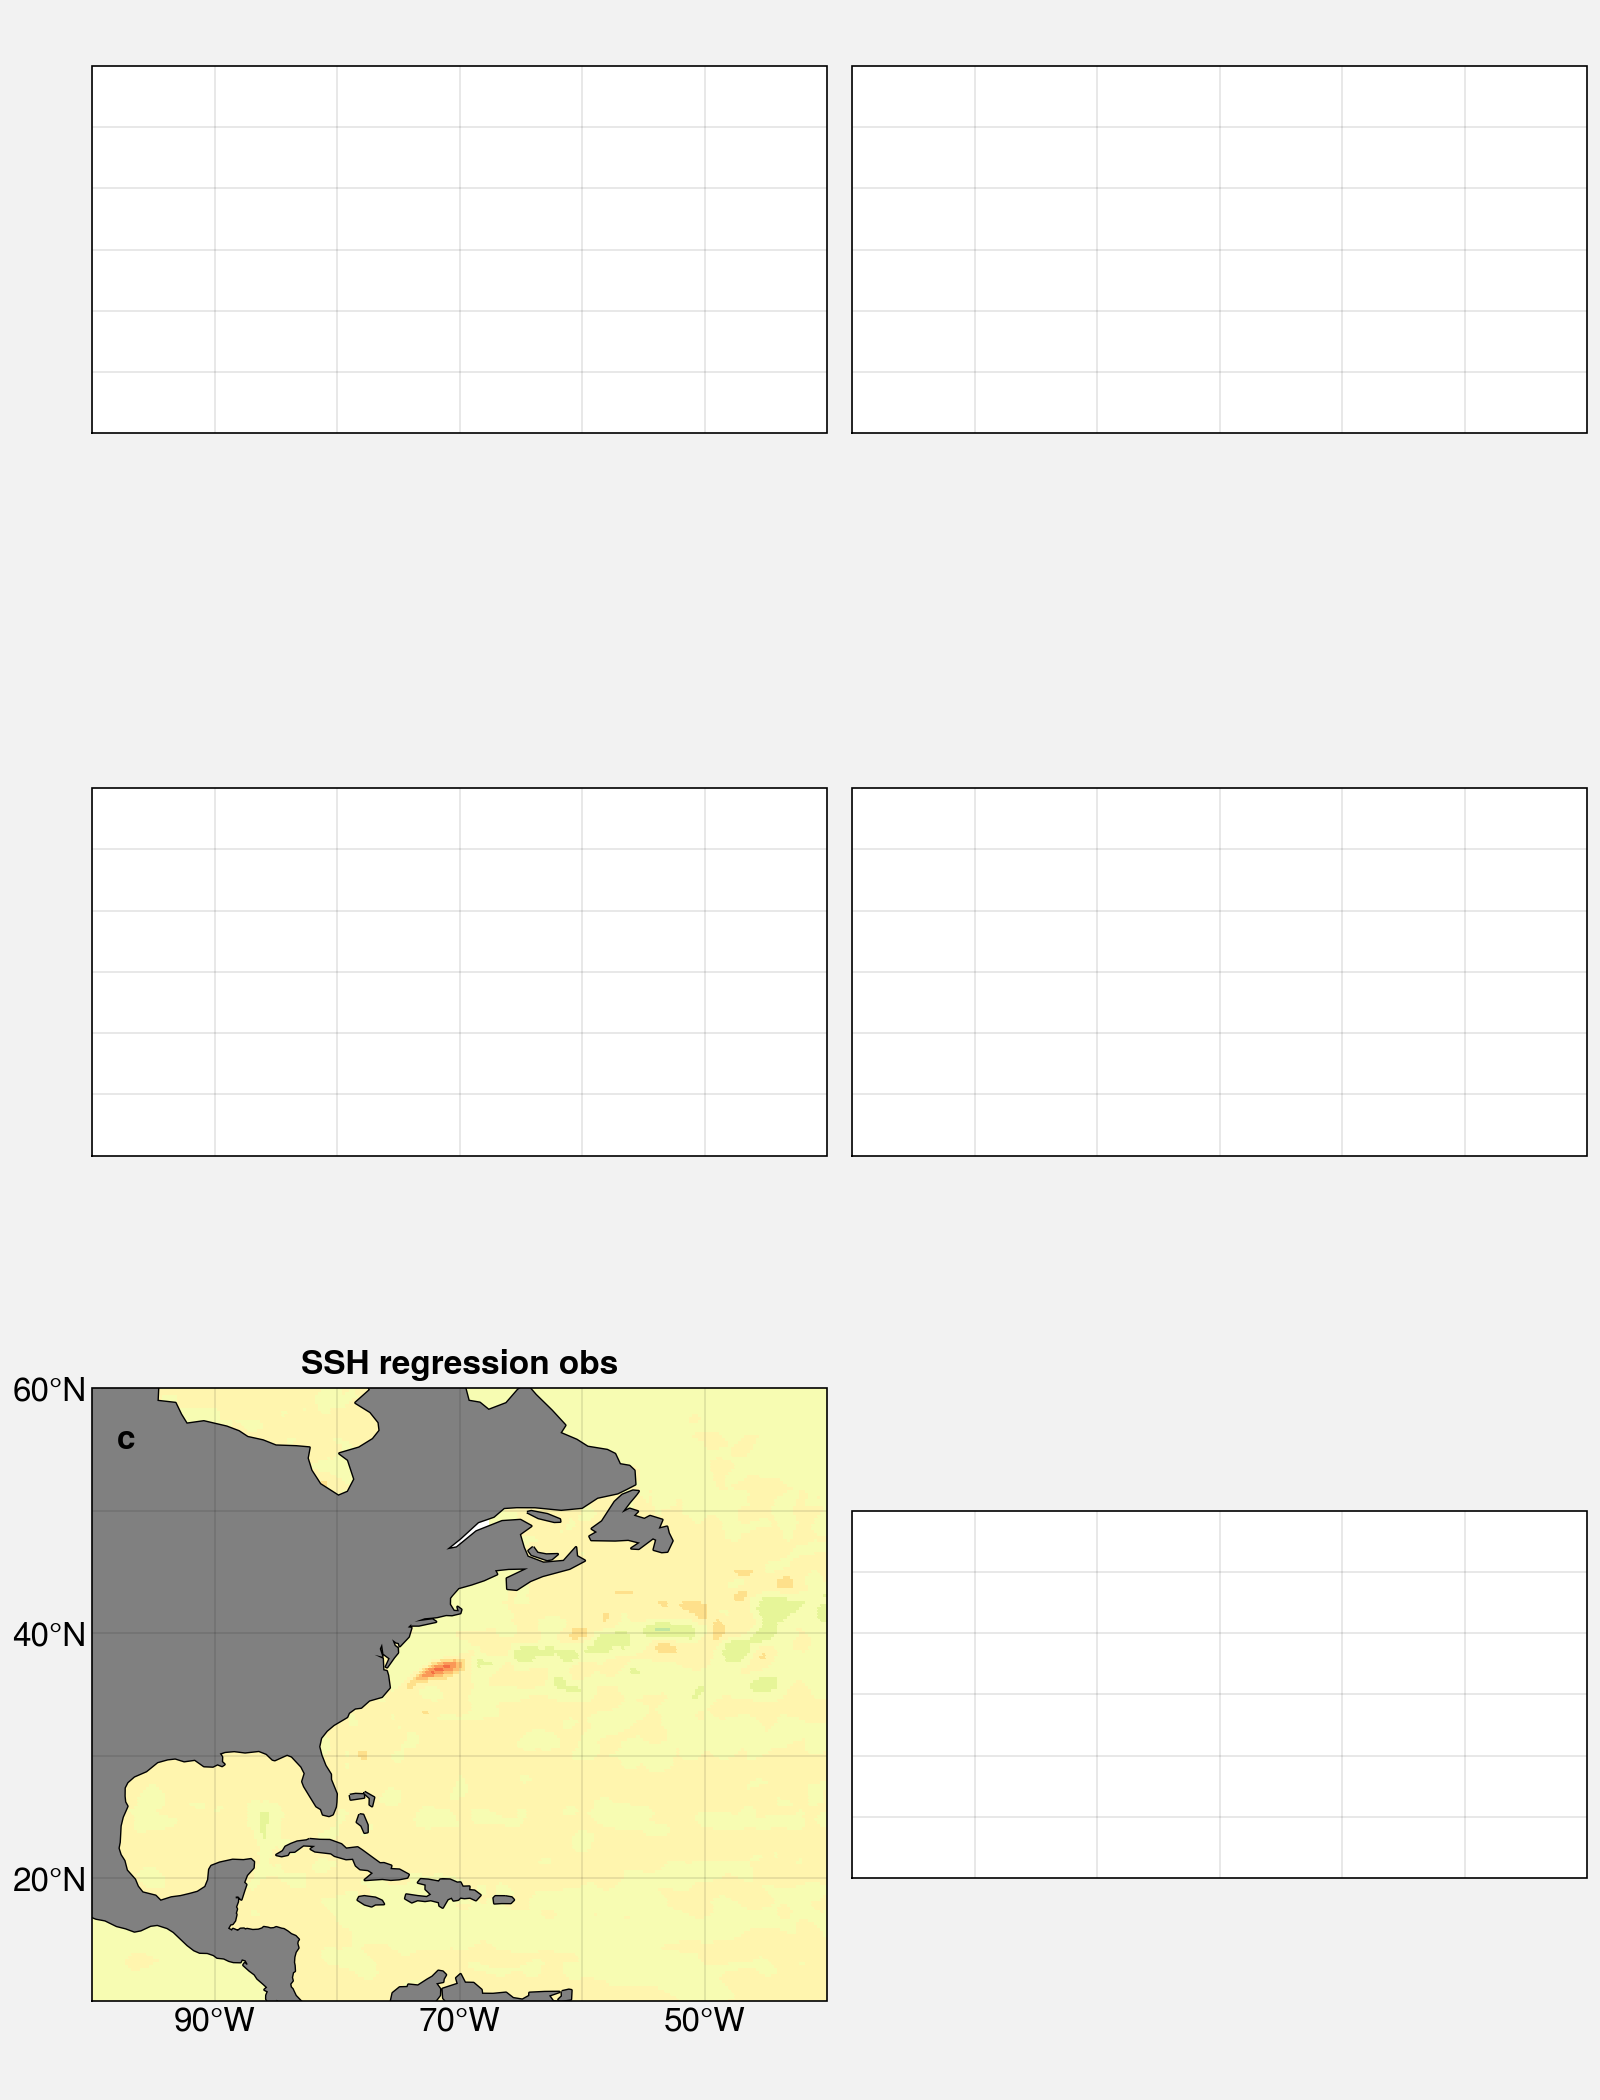

In [28]:
fig1, axs = plot.subplots(nrows=3,ncols=2,proj='cyl',width='8in',height='10.5in')

m20=axs[2,0].pcolormesh(ssha_NA_obs.longitude, ssha_NA_obs.latitude, 
        ssh_tr_NA_obs*100, levels=np.arange(-2.1,2.1+0.1,0.3), transform=pc, 
        cmap="spectral_r", extend='both')
# cs10=axs[1,0].contour(ds_NA_g16.TLONG, ds_NA_g16.TLAT, 
#         ssh2AMOCm_NA_TLmCL, levels=[-1], transform=pc, color='r')
# axs[0,0].scatter(lonm_NA_g16, latm_NA_g16, 
#         s=5, color='k', marker='x', alpha=0.5)
# axs[1,0].plot(-71.1,42.2,transform=pc,marker='*',color='r',markersize=10)
# Boston (71.1W, 42.4N)
# axs[1,0].plot(-75.5,35.2,transform=pc,marker='*',color='b',markersize=10)
# Cape Hatters (75.5W, 35.2N)
axs[2,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[2,0].format(land=True, landcolor='grey')
axs[2,0].set_extent([lon1_NA, lon2_NA, lat1_NA, lat2_NA], crs=pc)
axs[2,0].set_xticks(np.arange(lon1_NA+10,lon2_NA+1,20), crs=pc)
axs[2,0].set_xticklabels(np.arange(lon1_NA+10,lon2_NA+1,20), fontsize=12)
axs[2,0].xaxis.set_major_formatter(lon_formatter)
axs[2,0].set_yticks(np.arange(lat1_NA+10,lat2_NA+1, 20), crs=pc)
axs[2,0].set_yticklabels(np.arange(lat1_NA+10,lat2_NA+1, 20), fontsize=12)
axs[2,0].yaxis.set_major_formatter(lat_formatter)
axs[2,0].set_title('SSH regression obs', fontsize=12, fontweight='bold')
axs[2,0].text(-98, 55, 'c', transform=pc, fontsize=12, fontweight='bold')


In [ ]:
ds_ssh_obs = ds_ssh_raw_obs.assign_coords(time=time_yr_ssh_obs)
ds_ssh_obs

In [4]:
# #TH: transient HR
# infile_ssh_TH = ('/ihesp/archive/Sunway_Runs/HR_HF_TNST/'
#               'B.E.13.BTRANS.ne120_t12.sehires38.003.sunway.pop.h.SSH.185001.210012.nc')

# infile0_TH = ('/ihesp/archive/'
#               'B.E.13.BHISTC5.ne120_t12.sehires38.003.sunway/ocn/monthly/'
#               'B.E.13.BHISTC5.ne120_t12.sehires38.003.sunway.pop.h.1850-01.nc')

# ds_ssh_TH = xr.open_dataset(infile_ssh_TH,chunks=chunks_HR)
# ds_ssh_TH
# # ds0_TH = xr.open_dataset(infile0_TH, chunks=chunks_HR)
# # ds_vel0_TH
# ssh_NA_TH = ds_ssh_TH.SSH.resample()

# ssh1_TH = ds_ssh_TH.SSH.)).mean('time').where(
#     ds_t12.KMT>0, np.nan)+0.215 

# ds_ssh_TH.SSH.resample(time='A').mean('time')

# # mask land with nan and subtract global mean of -0.215 cm
# ssh1_NA_TH = ssh1_TH.isel(nlon=slice(nlon1_NA_t12, nlon2_NA_t12),nlat=slice(nlat1_NA_t12, nlat2_NA_t12)).compute()

<xarray.Dataset>
Dimensions:     (d2: 2, nlat: 2400, nlon: 3600, time: 3012)
Coordinates:
  * time        (time) object 1850-02-01 00:00:00 ... 2100-12-17 00:00:00
    TLONG       (nlat, nlon) float64 dask.array<chunksize=(400, 300), meta=np.ndarray>
    TLAT        (nlat, nlon) float64 dask.array<chunksize=(400, 300), meta=np.ndarray>
Dimensions without coordinates: d2, nlat, nlon
Data variables:
    time_bound  (time, d2) object dask.array<chunksize=(3012, 2), meta=np.ndarray>
    SSH         (time, nlat, nlon) float32 dask.array<chunksize=(3012, 400, 300), meta=np.ndarray>
Attributes:
    title:           B.E.13.BHISTC5.ne120_t12.sehires38.003.sunway
    Conventions:     CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curr...
    contents:        Diagnostic and Prognostic Variables
    source:          CCSM POP2, the CCSM Ocean Component
    revision:        $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    calendar:        All years have exactly  365 days.
    start_time:      This dataset was created on 2019-10-29 at 17:54:15.4
    cell_methods:    cell_methods = time: mean ==> the variable values are av...
    nsteps_total:    19331
    tavg_sum:        2676600.0
    tavg_sum_qflux:  2676600.0
    NCO:             netCDF Operators version 4.9.1 (Homepage = http://nco.sf...

In [6]:
# TL: transient LR
infile_ssh_TL = ('/ihesp/archive/Sunway_Runs/LR_HF_TNST/'
              'B.E.13.BTRANS.ne30g16.sehires38.003.sunway.pop.h.SSH.185001.210012.nc')

infile0_TL = ('/ihesp/archive/'
              'B.E.13.BHISTC5.ne30g16.sehires38.003.sunway/ocn/monthly/'
        'cmpr_B.E.13.BHISTC5.ne30g16.sehires38.003.sunway.pop.h.1850-01.nc')

ds_ssh_TL = xr.open_dataset(infile_ssh_TL,chunks=chunks_LR)
ds_ssh_TL 
# ds0_TL = xr.open_dataset(infile0_TL,chunks=chunk_size_LR)

<xarray.Dataset>
Dimensions:     (d2: 2, nlat: 384, nlon: 320, time: 3012)
Coordinates:
  * time        (time) object 1850-01-17 12:00:00 ... 2100-12-17 00:00:00
    TLONG       (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT        (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
Dimensions without coordinates: d2, nlat, nlon
Data variables:
    time_bound  (time, d2) object dask.array<chunksize=(3012, 2), meta=np.ndarray>
    SSH         (time, nlat, nlon) float32 dask.array<chunksize=(3012, 384, 320), meta=np.ndarray>
Attributes: (12/13)
    title:           B.E.13.BHISTC5.ne30g16.sehires38.003.sunway
    history:         Thu May 14 01:43:04 2020: ncra -O -v SSH /home/export/on...
    Conventions:     CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curr...
    contents:        Diagnostic and Prognostic Variables
    source:          CCSM POP2, the CCSM Ocean Component
    revision:        $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    ...              ...
    start_time:      This dataset was created on 2020-04-11 at 22:12:21.5
    cell_methods:    cell_methods = time: mean ==> the variable values are av...
    nsteps_total:    25
    tavg_sum:        86400.0
    tavg_sum_qflux:  86400.0
    NCO:             netCDF Operators version 4.9.1 (Homepage = http://nco.sf...

In [7]:
infile1_ssh_CL = ('/ihesp/archive/Sunway_Runs/LR_PI_CTRL/'
              'B.E.13.B1850C5.ne30g16.sehires38.003.sunway.pop.h.SSH.000101.050012.nc')
ds_ssh_CL_raw = xr.open_dataset(infile1_ssh_CL,chunks=chunks_LR)
print(ds_ssh_CL_raw.time)
# 250-->1850, 500-->2100
# 1-->1601, # 1850-(250-1)=1601
time_ssh_CL = xr.cftime_range(start="1601-01", end="2101-01", freq='M', calendar='noleap')
# 2101-01 is not included, the last time is 2100-12
ds_ssh_CL = ds_ssh_CL_raw.assign_coords(time=time_ssh_CL)
ds_ssh_CL

<xarray.DataArray 'time' (time: 6000)>
array([cftime.DatetimeNoLeap(1, 2, 1, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(1, 3, 1, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(1, 4, 1, 0, 0, 0, 0), ...,
       cftime.DatetimeNoLeap(500, 10, 17, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(500, 11, 16, 12, 0, 0, 0),
       cftime.DatetimeNoLeap(500, 12, 17, 0, 0, 0, 0)], dtype=object)
Coordinates:
  * time     (time) object 0001-02-01 00:00:00 ... 0500-12-17 00:00:00
Attributes:
    long_name:  time
    bounds:     time_bound


<xarray.Dataset>
Dimensions:     (d2: 2, nlat: 384, nlon: 320, time: 6000)
Coordinates:
  * time        (time) object 1601-01-31 00:00:00 ... 2100-12-31 00:00:00
    TLONG       (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT        (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
Dimensions without coordinates: d2, nlat, nlon
Data variables:
    time_bound  (time, d2) object dask.array<chunksize=(6000, 2), meta=np.ndarray>
    SSH         (time, nlat, nlon) float32 dask.array<chunksize=(6000, 384, 320), meta=np.ndarray>
Attributes:
    title:           B.E.13.B1850C5.ne30g16.sehires38.003.sunway
    history:         none
    Conventions:     CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curr...
    contents:        Diagnostic and Prognostic Variables
    source:          CCSM POP2, the CCSM Ocean Component
    revision:        $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    calendar:        All years have exactly  365 days.
    start_time:      This dataset was created on 2020-03-12 at 12:53:17.5
    cell_methods:    cell_methods = time: mean ==> the variable values are av...
    nsteps_total:    750
    tavg_sum:        2592000.0
    tavg_sum_qflux:  2592000.0

In [11]:
print(ds_ssh_TL.time)
ds_ssh_TL.time.to_pandas().index.to_julian_date() 

<xarray.DataArray 'time' (time: 3012)>
array([cftime.DatetimeNoLeap(1850, 1, 17, 12, 0, 0, 0),
       cftime.DatetimeNoLeap(1850, 2, 15, 12, 0, 0, 0),
       cftime.DatetimeNoLeap(1850, 3, 17, 0, 0, 0, 0), ...,
       cftime.DatetimeNoLeap(2100, 10, 17, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2100, 11, 16, 12, 0, 0, 0),
       cftime.DatetimeNoLeap(2100, 12, 17, 0, 0, 0, 0)], dtype=object)
Coordinates:
  * time     (time) object 1850-01-17 12:00:00 ... 2100-12-17 00:00:00
Attributes:
    long_name:     time
    bounds:        time_bound
    cell_methods:  time: mean


AttributeError: 'CFTimeIndex' object has no attribute 'to_julian_date'

In [17]:
ssh1= ds_ssh_TL.SSH.isel(time=slice(1,10))
ssh1.time

<xarray.DataArray 'time' (time: 9)>
array([cftime.DatetimeNoLeap(1850, 2, 15, 12, 0, 0, 0),
       cftime.DatetimeNoLeap(1850, 3, 17, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(1850, 4, 16, 12, 0, 0, 0),
       cftime.DatetimeNoLeap(1850, 5, 17, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(1850, 6, 16, 12, 0, 0, 0),
       cftime.DatetimeNoLeap(1850, 7, 17, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(1850, 8, 17, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(1850, 9, 16, 12, 0, 0, 0),
       cftime.DatetimeNoLeap(1850, 10, 17, 0, 0, 0, 0)], dtype=object)
Coordinates:
  * time     (time) object 1850-02-15 12:00:00 ... 1850-10-17 00:00:00
Attributes:
    long_name:     time
    bounds:        time_bound
    cell_methods:  time: mean

In [25]:
ssh2 = ssh1.assign_coords(time=np.arange(1850.5,1859.5))
ssh2

<xarray.DataArray 'SSH' (time: 9, nlat: 384, nlon: 320)>
dask.array<getitem, shape=(9, 384, 320), dtype=float32, chunksize=(9, 384, 320), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) float64 1.85e+03 1.852e+03 1.852e+03 ... 1.858e+03 1.858e+03
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon
Attributes:
    long_name:     Sea Surface Height
    units:         centimeter
    grid_loc:      2110
    cell_methods:  time: mean

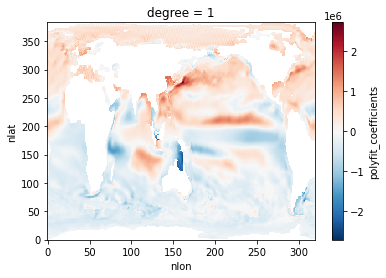

In [22]:
ssh2_tr = ssh2.polyfit(dim='time',deg=1).polyfit_coefficients.sel(degree=1)*1000*365 # m/day to mm/yr
ssh2_tr.plot()

In [3]:
date_str='2021Mar05'

# --- time for trends ---
yr1 = '1993'
yr2 = '2018'
yrs = np.arange(1993,2019) # 2018 is the last year of FOSI run
# mons = np.arange(1,13)
jultime_vec = pd.date_range(start=(yr1+'-12-31'), end=(yr2+'-12-31'), freq="Y")
print(jultime_vec)
jultime = jultime_vec.to_julian_date()
print(jultime)
# -----------------------

 
indir = '/scratch/user/dapengli/Projects4iHESP/Project_SeaLevelChange_2020Dec15/DataAnalysis/data_after_manipulation/test/'

# === HR ===
# chunk_size = {'nlat':800,'nlon':900}
# prefix = 'B.E.13.B1950TRC5.ne120_t12.cesm-ihesp-1950-2050.013.pop.h.nday1.'
# infile = indir + 'B.E.13.B1950TRC5.ne120_t12.cesm-ihesp-1950-2050.013.pop.h.nday1.SSH_1950_2050YearAv_2021Mar04.nc'
# ==========

# === LR ===
chunk_size = {'nlat':384,'nlon':320}
prefix = 'b.e13.B1950TRC5.ne30_g16.ihesp24_1950-2050.002.pop.h.nday1.'
infile = indir + 'b.e13.B1950TRC5.ne30_g16.ihesp24_1950-2050.002.pop.h.nday1.SSH1950_2050YearAv_2021Mar04.nc'
# ==========


outdir = '/scratch/user/dapengli/Projects4iHESP/Project_SeaLevelChange_2020Dec15/DataAnalysis/data_after_manipulation/test/'
outfile = outdir + prefix + '_SLA1993_2018Trend_' + date_str + '.nc'

DatetimeIndex(['1993-12-31', '1994-12-31', '1995-12-31', '1996-12-31',
               '1997-12-31', '1998-12-31', '1999-12-31', '2000-12-31',
               '2001-12-31', '2002-12-31', '2003-12-31', '2004-12-31',
               '2005-12-31', '2006-12-31', '2007-12-31', '2008-12-31',
               '2009-12-31', '2010-12-31', '2011-12-31', '2012-12-31',
               '2013-12-31', '2014-12-31', '2015-12-31', '2016-12-31',
               '2017-12-31', '2018-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')
Float64Index([2449352.5, 2449717.5, 2450082.5, 2450448.5, 2450813.5, 2451178.5,
              2451543.5, 2451909.5, 2452274.5, 2452639.5, 2453004.5, 2453370.5,
              2453735.5, 2454100.5, 2454465.5, 2454831.5, 2455196.5, 2455561.5,
              2455926.5, 2456292.5, 2456657.5, 2457022.5, 2457387.5, 2457753.5,
              2458118.5, 2458483.5],
             dtype='float64')


drop variables other than SSH and coordiantes, it is 1/3 faster (1min44s without drop and 1min10s with drop for 8 cores)

In [4]:
ds = xr.open_dataset(infile, chunks=chunk_size)
ds 

<xarray.Dataset>
Dimensions:  (nlat: 384, nlon: 320, time: 100)
Coordinates:
  * time     (time) object 1951-12-31 00:00:00 ... 2050-12-31 00:00:00
    ULONG    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULAT     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon
Data variables:
    SSH      (time, nlat, nlon) float32 dask.array<chunksize=(100, 384, 320), meta=np.ndarray>

In [5]:
# no need to subtract MDT when computing linear trends 
# MDT = ds.SSH.sel(time=slice("1993", "2012")).mean('time') # Altimetry data uses 1993-2012 mean for mean sea level
# MDT.plot()
# MDT
# SLA = ds.SSH - MDT
# SLA.isel(time=0).plot.pcolormesh()
# SLA

In [6]:
ssh = ds.SSH.sel(time=slice(yr1,yr2))
print(ssh.time)
ssh = ssh.assign_coords(time=jultime)
ssh

<xarray.DataArray 'time' (time: 26)>
array([cftime.DatetimeNoLeap(1993-12-31 00:00:00),
       cftime.DatetimeNoLeap(1994-12-31 00:00:00),
       cftime.DatetimeNoLeap(1995-12-31 00:00:00),
       cftime.DatetimeNoLeap(1996-12-31 00:00:00),
       cftime.DatetimeNoLeap(1997-12-31 00:00:00),
       cftime.DatetimeNoLeap(1998-12-31 00:00:00),
       cftime.DatetimeNoLeap(1999-12-31 00:00:00),
       cftime.DatetimeNoLeap(2000-12-31 00:00:00),
       cftime.DatetimeNoLeap(2001-12-31 00:00:00),
       cftime.DatetimeNoLeap(2002-12-31 00:00:00),
       cftime.DatetimeNoLeap(2003-12-31 00:00:00),
       cftime.DatetimeNoLeap(2004-12-31 00:00:00),
       cftime.DatetimeNoLeap(2005-12-31 00:00:00),
       cftime.DatetimeNoLeap(2006-12-31 00:00:00),
       cftime.DatetimeNoLeap(2007-12-31 00:00:00),
       cftime.DatetimeNoLeap(2008-12-31 00:00:00),
       cftime.DatetimeNoLeap(2009-12-31 00:00:00),
       cftime.DatetimeNoLeap(2010-12-31 00:00:00),
       cftime.DatetimeNoLeap(2011-12-31 00:00

<xarray.DataArray 'SSH' (time: 26, nlat: 384, nlon: 320)>
dask.array<getitem, shape=(26, 384, 320), dtype=float32, chunksize=(26, 384, 320), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) float64 2.449e+06 2.45e+06 2.45e+06 ... 2.458e+06 2.458e+06
    ULONG    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULAT     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon

In [7]:
trend_ssh = ssh.polyfit(dim='time',deg=1).polyfit_coefficients.sel(degree=1)*10*365 # unit: cm/day to mm/yr 

trend_ssh = trend_ssh.rename('trend_ssh')
trend_ssh.attrs['LongName'] = ('linear trend in SSH from ' + yr1 +'-'+yr2)
trend_ssh.attrs['units'] = 'mm/yr'
trend_ssh.attrs['SourceCode'] = 'saveSSH1993-2018Trends_HR_LR_2021Mar05.ipynb'
trend_ssh

<xarray.DataArray 'trend_ssh' (nlat: 384, nlon: 320)>
dask.array<mul, shape=(384, 320), dtype=float64, chunksize=(384, 320), chunktype=numpy.ndarray>
Coordinates:
    degree   int64 1
  * nlat     (nlat) int64 0 1 2 3 4 5 6 7 8 ... 376 377 378 379 380 381 382 383
  * nlon     (nlon) int64 0 1 2 3 4 5 6 7 8 ... 312 313 314 315 316 317 318 319
Attributes:
    LongName:    linear trend in SSH from 1993-2018
    units:       mm/yr
    SourceCode:  saveSSH1993-2018Trends_HR_LR_2021Mar05.ipynb

In [8]:
%%time
trend_ssh.to_netcdf(path=outfile,mode='w',format='NETCDF4',compute=True)

CPU times: user 24 ms, sys: 5 ms, total: 29 ms
Wall time: 12.8 s


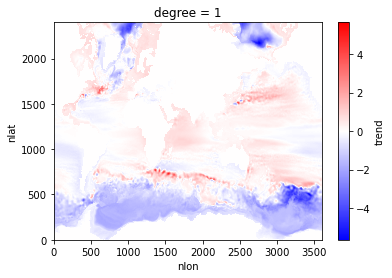

In [14]:
trend.plot.pcolormesh(cmap='bwr')

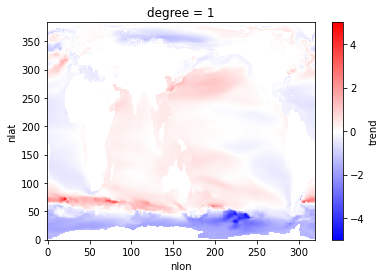

In [14]:
trend.plot.pcolormesh(vmin=-5, vmax=5, cmap='bwr')

In [5]:
droplist=list(ds0.variables)
keeplist=['SSH','time','TLONG','TLAT']
for i in keeplist:
    droplist.remove(i)
droplist

['z_t',
 'z_t_150m',
 'z_w',
 'z_w_top',
 'z_w_bot',
 'dz',
 'dzw',
 'ULONG',
 'ULAT',
 'KMT',
 'KMU',
 'REGION_MASK',
 'UAREA',
 'TAREA',
 'HU',
 'HT',
 'DXU',
 'DYU',
 'DXT',
 'DYT',
 'HTN',
 'HTE',
 'HUS',
 'HUW',
 'ANGLE',
 'ANGLET',
 'days_in_norm_year',
 'grav',
 'omega',
 'radius',
 'cp_sw',
 'sound',
 'vonkar',
 'cp_air',
 'rho_air',
 'rho_sw',
 'rho_fw',
 'stefan_boltzmann',
 'latent_heat_vapor',
 'latent_heat_fusion',
 'latent_heat_fusion_mks',
 'ocn_ref_salinity',
 'sea_ice_salinity',
 'T0_Kelvin',
 'salt_to_ppt',
 'ppt_to_salt',
 'mass_to_Sv',
 'heat_to_PW',
 'salt_to_Svppt',
 'salt_to_mmday',
 'momentum_factor',
 'hflux_factor',
 'fwflux_factor',
 'salinity_factor',
 'sflux_factor',
 'nsurface_t',
 'nsurface_u',
 'time_bound',
 'ADVU',
 'ADVV',
 'GRADX',
 'GRADY',
 'HDIFFU',
 'HDIFFV',
 'VDIFFU',
 'VDIFFV',
 'UVEL',
 'UVEL2',
 'VVEL',
 'VVEL2',
 'KE',
 'TEMP',
 'SALT',
 'UV',
 'SU',
 'SV',
 'SSH2',
 'SHF',
 'SHF_QSW',
 'SFWF',
 'SFWF_WRST',
 'TAUX',
 'TAUX2',
 'TAUY',
 'TA

In [6]:
%%time
ds_HR = xr.open_mfdataset(infiles_HR, compat="override", combine="by_coords",data_vars="minimal",
                          coords="minimal",chunks={'nlat':800,'nlon':900},drop_variables=droplist,parallel=True)
ds_HR

CPU times: user 1.29 s, sys: 47 ms, total: 1.33 s
Wall time: 33 s


<xarray.Dataset>
Dimensions:  (nlat: 2400, nlon: 3600, time: 312)
Coordinates:
  * time     (time) object 0158-02-01 00:00:00 ... 0184-01-01 00:00:00
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(800, 900), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(800, 900), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon
Data variables:
    SSH      (time, nlat, nlon) float32 dask.array<chunksize=(1, 800, 900), meta=np.ndarray>
Attributes:
    title:             g.e20.G.TL319_t13.control.001_contd
    history:           none
    Conventions:       CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-cu...
    time_period_freq:  day_5
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    contents:          Diagnostic and Prognostic Variables
    source:            CCSM POP2, the CCSM Ocean Component
    revision:          $Id: tavg.F90 90507 2019-01-18 20:54:19Z altuntas@ucar...
    calendar:          All years have exactly  365 days.
    start_time:        This dataset was created on 2019-09-20 at 15:51:47.9
    cell_methods:      cell_methods = time: mean ==> the variable values are ...

# data analysis
convert FOSI time to real time stamp (I tried to shift original nc file time (see the appendix), but it's easier to just create new time stamps)

In [7]:
# new time stamp in datetime64[ns]
time1=pd.date_range(start=(str(yrs[0])+'-01-01'), end=(str(yrs[-1])+'-12-01'),freq="MS").shift(14, "D") 
ds_HR = ds_HR.assign_coords(time=time1) 
ds_HR

<xarray.Dataset>
Dimensions:  (nlat: 2400, nlon: 3600, time: 312)
Coordinates:
  * time     (time) datetime64[ns] 1993-01-15 1993-02-15 ... 2018-12-15
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(800, 900), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(800, 900), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon
Data variables:
    SSH      (time, nlat, nlon) float32 dask.array<chunksize=(1, 800, 900), meta=np.ndarray>
Attributes:
    title:             g.e20.G.TL319_t13.control.001_contd
    history:           none
    Conventions:       CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-cu...
    time_period_freq:  day_5
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    contents:          Diagnostic and Prognostic Variables
    source:            CCSM POP2, the CCSM Ocean Component
    revision:          $Id: tavg.F90 90507 2019-01-18 20:54:19Z altuntas@ucar...
    calendar:          All years have exactly  365 days.
    start_time:        This dataset was created on 2019-09-20 at 15:51:47.9
    cell_methods:      cell_methods = time: mean ==> the variable values are ...

convert SSH to SLA

In [8]:
SSH_av = ds_HR.sel(time=slice("1993", "2012")).SSH.mean('time') # Altimetry data uses 1993-2012 mean for mean sea level
SSH_av
SLA = (ds_HR.SSH-SSH_av).rename('SLA')
SLA

<xarray.DataArray 'SLA' (time: 312, nlat: 2400, nlon: 3600)>
dask.array<sub, shape=(312, 2400, 3600), dtype=float32, chunksize=(1, 800, 900), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1993-01-15 1993-02-15 ... 2018-12-15
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(800, 900), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(800, 900), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon

compute seasonal climatology

In [9]:
clim_HR = SLA.groupby("time.month").mean("time")
clim_HR

<xarray.DataArray 'SLA' (month: 12, nlat: 2400, nlon: 3600)>
dask.array<stack, shape=(12, 2400, 3600), dtype=float32, chunksize=(1, 800, 900), chunktype=numpy.ndarray>
Coordinates:
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(800, 900), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(800, 900), meta=np.ndarray>
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: nlat, nlon

compute anomalies

In [10]:
anom_HR = SLA.groupby("time.month") - clim_HR
anom_HR

<xarray.DataArray 'SLA' (time: 312, nlat: 2400, nlon: 3600)>
dask.array<getitem, shape=(312, 2400, 3600), dtype=float32, chunksize=(1, 800, 900), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1993-01-15 1993-02-15 ... 2018-12-15
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(800, 900), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(800, 900), meta=np.ndarray>
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: nlat, nlon

compute trends

In [11]:
jultime = anom_HR.time.to_pandas().index.to_julian_date() # convert datetime to julian date 
anom_HR = anom_HR.assign_coords(time=jultime)
anom_HR

<xarray.DataArray 'SLA' (time: 312, nlat: 2400, nlon: 3600)>
dask.array<getitem, shape=(312, 2400, 3600), dtype=float32, chunksize=(1, 800, 900), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) float64 2.449e+06 2.449e+06 ... 2.458e+06 2.458e+06
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(800, 900), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(800, 900), meta=np.ndarray>
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: nlat, nlon

In [12]:
trend = anom_HR.polyfit(dim='time',deg=1).polyfit_coefficients.sel(degree=1)*10*365 # unit: cm/day to mm/yr 
trend = trend.rename('trend')
trend

<xarray.DataArray 'trend' (nlat: 2400, nlon: 3600)>
dask.array<mul, shape=(2400, 3600), dtype=float64, chunksize=(200, 3600), chunktype=numpy.ndarray>
Coordinates:
    degree   int64 1
  * nlat     (nlat) int64 0 1 2 3 4 5 6 7 ... 2393 2394 2395 2396 2397 2398 2399
  * nlon     (nlon) int64 0 1 2 3 4 5 6 7 ... 3593 3594 3595 3596 3597 3598 3599

add attributes and save data to nc file

In [13]:
trend.attrs['long name'] = ('linear trend in SLA from ' + str(yrs[0])+'-'+str(yrs[-1]))
trend.attrs['units'] = 'mm/yr'
trend.attrs['source code'] = 'saveSLAtrendsFOSI_HR_2021Jan17.ipynb'
trend

<xarray.DataArray 'trend' (nlat: 2400, nlon: 3600)>
dask.array<mul, shape=(2400, 3600), dtype=float64, chunksize=(200, 3600), chunktype=numpy.ndarray>
Coordinates:
    degree   int64 1
  * nlat     (nlat) int64 0 1 2 3 4 5 6 7 ... 2393 2394 2395 2396 2397 2398 2399
  * nlon     (nlon) int64 0 1 2 3 4 5 6 7 ... 3593 3594 3595 3596 3597 3598 3599
Attributes:
    long name:    linear trend in SLA from 1993-2018
    units:        mm/yr
    source code:  saveSLAtrendsFOSI_HR_2021Jan17.ipynb

In [14]:
%%time
trend.to_netcdf(path=outfile1,mode='w',format='NETCDF4',compute=True)

CPU times: user 9.47 s, sys: 393 ms, total: 9.87 s
Wall time: 10min 39s


check output file

In [15]:
xr.open_dataset(outfile1)

<xarray.Dataset>
Dimensions:  (nlat: 2400, nlon: 3600)
Coordinates:
    degree   int64 ...
  * nlat     (nlat) int64 0 1 2 3 4 5 6 7 ... 2393 2394 2395 2396 2397 2398 2399
  * nlon     (nlon) int64 0 1 2 3 4 5 6 7 ... 3593 3594 3595 3596 3597 3598 3599
Data variables:
    trend    (nlat, nlon) float64 ...

# Appendix

shift FOSI time 

In [14]:
ds_HR.time.to_pandas().index

DatetimeIndex(['1993-01-15', '1993-02-15', '1993-03-15', '1993-04-15',
               '1993-05-15', '1993-06-15', '1993-07-15', '1993-08-15',
               '1993-09-15', '1993-10-15',
               ...
               '2018-03-15', '2018-04-15', '2018-05-15', '2018-06-15',
               '2018-07-15', '2018-08-15', '2018-09-15', '2018-10-15',
               '2018-11-15', '2018-12-15'],
              dtype='datetime64[ns]', name='time', length=312, freq=None)

In [16]:
ds_HR.time.to_pandas().index - 2*pd.Timedelta(365,unit='D') # shift 2 years

DatetimeIndex(['1991-01-16', '1991-02-16', '1991-03-16', '1991-04-16',
               '1991-05-16', '1991-06-16', '1991-07-16', '1991-08-16',
               '1991-09-16', '1991-10-16',
               ...
               '2016-03-15', '2016-04-15', '2016-05-15', '2016-06-15',
               '2016-07-15', '2016-08-15', '2016-09-15', '2016-10-15',
               '2016-11-15', '2016-12-15'],
              dtype='datetime64[ns]', name='time', length=312, freq=None)

In [17]:
ds_HR.time.to_pandas().index.shift(14, "D") # shift 14 days

DatetimeIndex(['1993-01-29', '1993-03-01', '1993-03-29', '1993-04-29',
               '1993-05-29', '1993-06-29', '1993-07-29', '1993-08-29',
               '1993-09-29', '1993-10-29',
               ...
               '2018-03-29', '2018-04-29', '2018-05-29', '2018-06-29',
               '2018-07-29', '2018-08-29', '2018-09-29', '2018-10-29',
               '2018-11-29', '2018-12-29'],
              dtype='datetime64[ns]', name='time', length=312, freq=None)